# Table of Content
* <span style="line-height: 1.5; font-size:150%;"> [Importing Libraries](#h1)</span>
* <span style="line-height: 1.5; font-size:150%;"> [Loading Dataset](#h2)</span>
* <span style="line-height: 1.5; font-size:150%;"> [EDA](#h3)</span>
    * <span style="line-height: 1; font-size:130%;"> [Column Description](#h3-001)</span>
    * <span style="line-height: 1; font-size:130%;"> [Target Column](#h3-01)</span>
    * <span style="line-height: 1; font-size:130%;"> [Correlation of numerical features](#h3-1)</span>
    * <span style="line-height: 1; font-size:130%;"> [Univariate Analysis](#h3-2)</span>
        * <span style="line-height: 1; font-size:110%;"> [Location](#h3-2.1)</span>
        * <span style="line-height: 1; font-size:110%;"> [Part1-2](#h3-2.2)</span>
        * <span style="line-height: 1; font-size:110%;"> [Crime Time](#h3-2.3)</span>
        * <span style="line-height: 1; font-size:110%;"> [Area id](#h3-2.4)</span>
        * <span style="line-height: 1; font-size:110%;"> [Reporting district id](#h3-2.5)</span>
        * <span style="line-height: 1; font-size:110%;"> [Victim Sex](#h3-2.6)</span>
        * <span style="line-height: 1; font-size:110%;"> [Victim Age](#h3-2.7)</span>
        * <span style="line-height: 1; font-size:110%;"> [Victim Descent](#h3-2.8)</span>
        * <span style="line-height: 1; font-size:110%;"> [Modus Operandi](#h3-2.9)</span>
        * <span style="line-height: 1; font-size:110%;"> [Premise code](#h3-2.10)</span>
        * <span style="line-height: 1; font-size:110%;"> [Status](#h3-2.11)</span> 
    * <span style="line-height: 1; font-size:120%;"> [Derived columns](#h3-3)</span>
    * <span style="line-height: 1; font-size:120%;"> [Multivariate Analysis](#h3-4)</span>
        * <span style="line-height: 1; font-size:110%;"> [Victim sex w Target](#h3-4.01)</span>
        * <span style="line-height: 1; font-size:110%;"> [Area id w Target](#h3-4.02)</span>
        * <span style="line-height: 1; font-size:110%;"> [Victim sex w Age](#h3-4.03)</span>
        * <span style="line-height: 1; font-size:110%;"> [Weapon w Target](#h3-4.04)</span>
        * <span style="line-height: 1; font-size:110%;"> [Stauts w Target](#h3-4.05)</span>
        * <span style="line-height: 1; font-size:110%;"> [Correlation](#h3-4.1)</span>
        * <span style="line-height: 1; font-size:110%;"> [Date](#h3-4.2)</span>
        * <span style="line-height: 1; font-size:110%;"> [Years](#h3-4.3)</span>
        * <span style="line-height: 1; font-size:110%;"> [Reporting Trends](#h3-4.4)</span>
        * <span style="line-height: 1; font-size:110%;"> [Month](#h3-4.5)</span>
        * <span style="line-height: 1; font-size:110%;"> [Duration v/s Crime Classification](#h3-4.6)</span>
* <span style="line-height: 1.5; font-size:150%;"> [Preprocessing](#h4)</span>
* <span style="line-height: 1.5; font-size:150%;"> [Transformation](#h5)</span>
* <span style="line-height: 1.5; font-size:150%;"> [Pipeline](#h6)</span>
* <span style="line-height: 1.5; font-size:150%;"> [Model Training and Evaluation](#h7)</span>
    * <span style="line-height: 1; font-size:120%;"> [LBGMClassifier](#h7.1)</span>
    * <span style="line-height: 1; font-size:120%;"> [XG Boost](#h7.2)</span>
    * <span style="line-height: 1; font-size:120%;"> [Decision Tree](#h7.3)</span>
    * <span style="line-height: 1; font-size:120%;"> [Logistic Regression](#h7.4)</span>

<a id='h1'> </a>
# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

<a id='h2'> </a>
# Loading Dataset


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,3/9/2020 0:00,3/6/2020 0:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2/27/2020 0:00,2/27/2020 0:00,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,8/21/2020 0:00,8/21/2020 0:00,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/8/2020 0:00,11/6/2020 0:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,2/25/2020 0:00,2/25/2020 0:00,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


<a id='h3'> </a>
# EDA

In [4]:
train.shape

(20000, 22)

In [5]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,3/9/2020 0:00,3/6/2020 0:00,1800,15,N Hollywood,1563,...,75,M,W,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2/27/2020 0:00,2/27/2020 0:00,1345,13,Newton,1367,...,41,M,H,216,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,8/21/2020 0:00,8/21/2020 0:00,605,13,Newton,1343,...,67,M,B,501,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/8/2020 0:00,11/6/2020 0:00,1800,19,Mission,1924,...,61,M,H,101,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,2/25/2020 0:00,2/25/2020 0:00,1130,12,77th Street,1245,...,0,X,X,401,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes



<a id='h3-001'> </a>
## Column Description

* <span style="line-height: 1; font-size:130%;"> `Location`: Street address of the crime incident.
* <span style="line-height: 1; font-size:130%;"> `Cross_Street`: Cross street of the rounded address.
* <span style="line-height: 1; font-size:130%;"> `Latitude`: Latitude coordinates of the crime incident.
* <span style="line-height: 1; font-size:130%;"> `Longitude`: Longitude coordinates of the crime incident.
* <span style="line-height: 1; font-size:130%;"> `Date_Reported`: Date the incident was reported.
* <span style="line-height: 1; font-size:130%;"> `Date_Occurred`: Date the incident occurred.
* <span style="line-height: 1; font-size:130%;"> `Time_Occurred`: Time the incident occurred in 24-hour military time.
* <span style="line-height: 1; font-size:130%;"> `Area_ID`: LAPD's Geographic Area number.
* <span style="line-height: 1; font-size:130%;"> `Area_Name`: Name designation of the LAPD Geographic Area.
* <span style="line-height: 1; font-size:130%;"> `Reporting_District_no`: Reporting district number.
* <span style="line-height: 1; font-size:130%;"> `Part 1-2`: Crime classification.
* <span style="line-height: 1; font-size:130%;"> `Modus_Operandi`: Activities associated with the suspect.
* <span style="line-height: 1; font-size:130%;"> `Victim_Age`: Age of the victim.
* <span style="line-height: 1; font-size:130%;"> `Victim_Sex`: Gender of the victim.
* <span style="line-height: 1; font-size:130%;"> `Victim_Descent`: Descent code of the victim.
* <span style="line-height: 1; font-size:130%;"> `Premise_Code`: Premise code indicating the location of the crime.
* <span style="line-height: 1; font-size:130%;"> `Premise_Description`: Description of the premise code.
* <span style="line-height: 1; font-size:130%;"> `Weapon_Used_Code`: Weapon code indicating the type of weapon used.
* <span style="line-height: 1; font-size:130%;"> `Weapon_Description`: Description of the weapon code.
* <span style="line-height: 1; font-size:130%;"> `Status`: Status of the case.
* <span style="line-height: 1; font-size:130%;"> `Status_Description`: Description of the status code.
* <span style="line-height: 1; font-size:130%;"> `Crime_Category`: The category of the crime (Target Variable)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  int64  
 7   Area_ID                20000 non-null  int64  
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  int64  
 10  Part 1-2               20000 non-null  int64  
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  int64  
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [7]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [8]:
test.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,1847.000000
mean,33.957169,-117.952663,1337.737400,10.736600,1119.879800,1.414000,30.592000,300.858800,364.014077
std,1.986742,6.890957,663.922202,6.051524,605.143645,0.492598,21.897905,212.253742,119.489932
min,0.000000,-118.650300,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.010800,-118.431200,900.000000,6.000000,628.000000,1.000000,14.000000,101.000000,309.000000
50%,34.058000,-118.323200,1430.000000,11.000000,1138.000000,1.000000,31.000000,203.000000,400.000000
75%,34.162250,-118.274600,1900.000000,16.000000,1622.250000,2.000000,46.000000,501.000000,400.000000
max,34.327500,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,957.000000,516.000000


### Insights 
* #### There are 20k rows and 22 Columns : 1 Target column and 21 Feature Columns
* #### Describe attribute indicates that both test and train dataset has similar distribution of data 
* #### Multiple columns have large amount of null data which we will explore later



In [8]:
train.isna().sum()/len(train)*100

Location                  0.000
Cross_Street             82.760
Latitude                  0.000
Longitude                 0.000
Date_Reported             0.000
Date_Occurred             0.000
Time_Occurred             0.000
Area_ID                   0.000
Area_Name                 0.000
Reporting_District_no     0.000
Part 1-2                  0.000
Modus_Operandi           13.705
Victim_Age                0.000
Victim_Sex               13.120
Victim_Descent           13.120
Premise_Code              0.000
Premise_Description       0.025
Weapon_Used_Code         63.325
Weapon_Description       63.325
Status                    0.000
Status_Description        0.000
Crime_Category            0.000
dtype: float64

### **Key Insights on Missing Values in Train Dataset:**

1. **Cross_Street**: Missing in approximately 82.76% of entries, indicating frequent unavailability.
2. **Modus_Operandi**: Missing in about 13.70% of entries, showing incomplete suspect activity details.
3. **Victim_Sex and Victim_Descent**: Both missing in approximately 13.12% of entries, pointing to gaps in victim demographic data.
4. **Weapon_Used_Code and Weapon_Description**: Both missing in around 63.33% of entries, reflecting significant lack of weapon information.

In [9]:
test.isna().sum()/len(test)*100

Location                  0.00
Cross_Street             83.80
Latitude                  0.00
Longitude                 0.00
Date_Reported             0.00
Date_Occurred             0.00
Time_Occurred             0.00
Area_ID                   0.00
Area_Name                 0.00
Reporting_District_no     0.00
Part 1-2                  0.00
Modus_Operandi           13.68
Victim_Age                0.00
Victim_Sex               12.86
Victim_Descent           12.86
Premise_Code              0.00
Premise_Description       0.02
Weapon_Used_Code         63.06
Weapon_Description       63.06
Status                    0.00
Status_Description        0.00
dtype: float64

### **Key Insights on Missing Values in Test Dataset:**

1. **Cross_Street**: Missing in approximately 83.80% of entries, indicating occasional unavailability.
2. **Modus_Operandi**: Missing in about 13.68% of entries, showing minor gaps in suspect activity details.
3. **Victim_Sex and Victim_Descent**: Both missing in approximately 12.86% of entries, pointing to small gaps in victim demographic data.
4. **Weapon_Used_Code and Weapon_Description**: Both missing in around 63.06% of entries, reflecting some lack of weapon information.

#### `Cross_street, Weapon :` have null values more than 50% in both train and test dataset thus can be dropped

<hr>

<a id='h3-01'> </a>
## Target Column

In [10]:
train['Crime_Category'].nunique()

6

In [11]:
train['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

In [12]:
train['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

In [13]:
train['Crime_Category'].value_counts()/len(train)*100

Crime_Category
Property Crimes                  58.330
Violent Crimes                   23.835
Crimes against Public Order       9.040
Fraud and White-Collar Crimes     6.775
Crimes against Persons            1.125
Other Crimes                      0.895
Name: count, dtype: float64

<Axes: ylabel='count'>

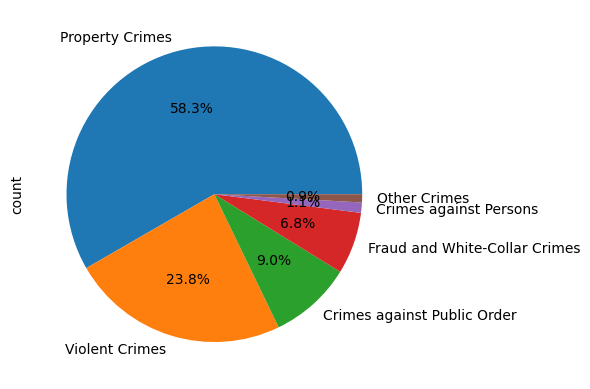

In [14]:
train['Crime_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Insights on Target Column
#### The dataset is imbalanced, with the majority of crimes falling within the `"property" and "violent"` categories.

* **Property Crimes: 58.33%** - The most prevalent category, indicating a high frequency of theft, burglary, and property damage incidents.
* **Violent Crimes: 23.83%** - The second-largest category, highlighting a significant number of incidents involving physical harm or threats.
* **Crimes against Public Order: 9.05%** - These crimes, which disrupt public peace and safety, are notable but less common.
* **Fraud and White-Collar Crimes: 6.77%** - Indicates a substantial presence of non-violent financial crimes.
* **Crimes against Persons: 1.13%** - Relatively rare, showing fewer personal assault incidents.
* **Other Crimes: 0.90%** - The least common category, encompassing miscellaneous criminal activities.


<hr>

<a id='h3-1'> </a>
## Correlation of features

In [15]:
# Adding a new numerical column of target ( Crime category ) such that we can find its correlation with other columns
train['Target_Label'] = LabelEncoder().fit_transform(train['Crime_Category'])
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Target_Label
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,4
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,4
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes,4
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,4
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,4


In [16]:
train.corr(numeric_only=True)

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code,Target_Label
Latitude,1.000000,-0.998910,0.005952,0.018411,0.017928,-0.036357,0.003195,-0.011293,-0.017656,0.021179
Longitude,-0.998910,1.000000,-0.005361,-0.006480,-0.006139,0.036373,-0.002252,0.011205,0.019185,-0.021645
Time_Occurred,0.005952,-0.005361,1.000000,0.012346,0.012127,-0.028881,-0.017798,-0.057534,-0.016911,0.040296
Area_ID,0.018411,-0.006480,0.012346,1.000000,0.999024,-0.002518,0.028966,0.004045,-0.027243,-0.011417
Reporting_District_no,0.017928,-0.006139,0.012127,0.999024,1.000000,-0.002108,0.028721,0.004121,-0.027117,-0.011914
Part 1-2,-0.036357,0.036373,-0.028881,-0.002518,-0.002108,1.000000,0.186780,0.254579,0.419642,-0.257909
Victim_Age,0.003195,-0.002252,-0.017798,0.028966,0.028721,0.186780,1.000000,0.191313,0.056768,-0.030696
Premise_Code,-0.011293,0.011205,-0.057534,0.004045,0.004121,0.254579,0.191313,1.000000,0.196771,-0.174398
Weapon_Used_Code,-0.017656,0.019185,-0.016911,-0.027243,-0.027117,0.419642,0.056768,0.196771,1.000000,0.022266
Target_Label,0.021179,-0.021645,0.040296,-0.011417,-0.011914,-0.257909,-0.030696,-0.174398,0.022266,1.000000


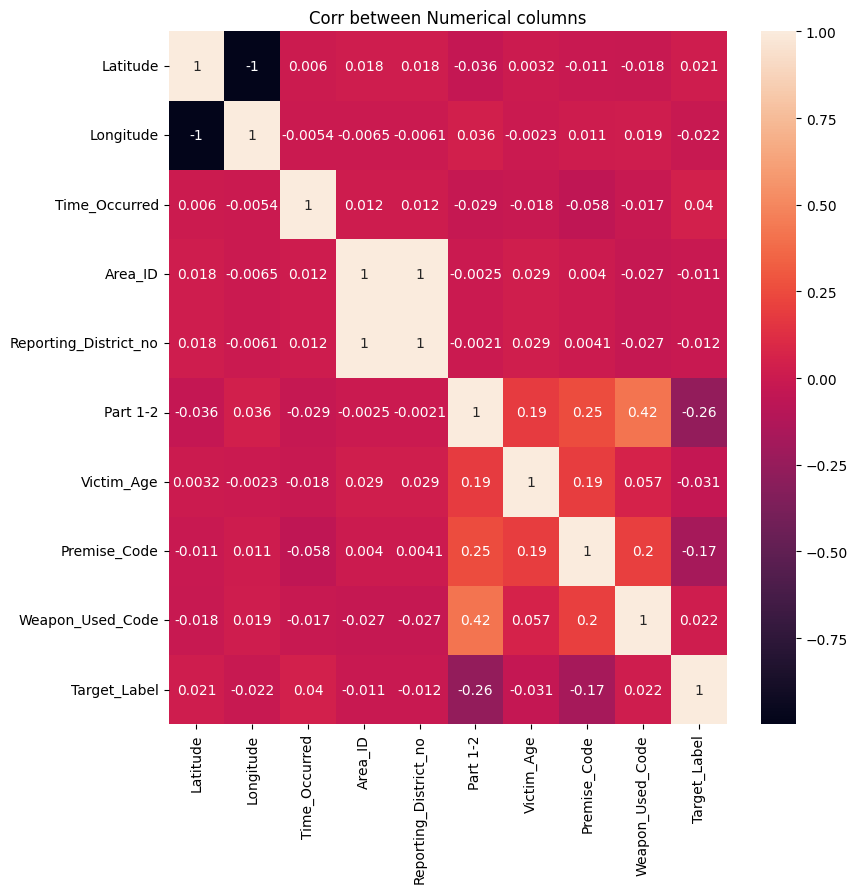

In [17]:
mycorr = train.corr(numeric_only=True)
plt.figure(figsize=(9,9))
sns.heatmap(mycorr,annot=True)
plt.title("Corr between Numerical columns")
plt.show()

### Insights 
* Area_id and Reporting district number are correlated 
* Part 1-2 and weapon used as well as premise code are correlated 
* Also none of the features are directly affecting target label

<hr size="7%" noshade>

 # Univariate Analysis <a id='h3-2'> </a>

In [18]:
train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category', 'Target_Label'],
      dtype='object')

In [ ]:
for x in train.columns:
    print(f"{x:<30} {train[x].nunique()}")

Location                       12399
Cross_Street                   1495
Latitude                       3622
Longitude                      3578
Date_Reported                  811
Date_Occurred                  366
Time_Occurred                  996
Area_ID                        21
Area_Name                      21
Reporting_District_no          1120
Part 1-2                       2
Modus_Operandi                 10489
Victim_Age                     100
Victim_Sex                     4
Victim_Descent                 17
Premise_Code                   217
Premise_Description            216
Weapon_Used_Code               57
Weapon_Description             57
Status                         5
Status_Description             5
Crime_Category                 6
Target_Label                   6



### Insights
#### `Missing Values`
- **Cross Street:** Contains a significant number of null values.
- **Weapon Used:** Also has a high number of null values.

#### `Redundant Columns`
##### There are several pairs of columns that are redundant and can be removed to simplify the dataset:

- **Status and Status Description:** These columns provide the same information.
- **Premise Code and Premise Description:** Both columns describe the location in different formats.
- **Area Name and Area ID:** Both columns describe the location in different formats.
- **Victim Sex and Victim Descent:** These columns are highly correlated and provide overlapping information.\


<hr>

<a id='h3-2.1'> </a>
## **Finding the TOP 50 Location where crime rate was high**

In [ ]:
train['Location'] = train['Location'].str.replace(r'\s+', ' ', regex=True).str.strip()
train['Location'].head(10)

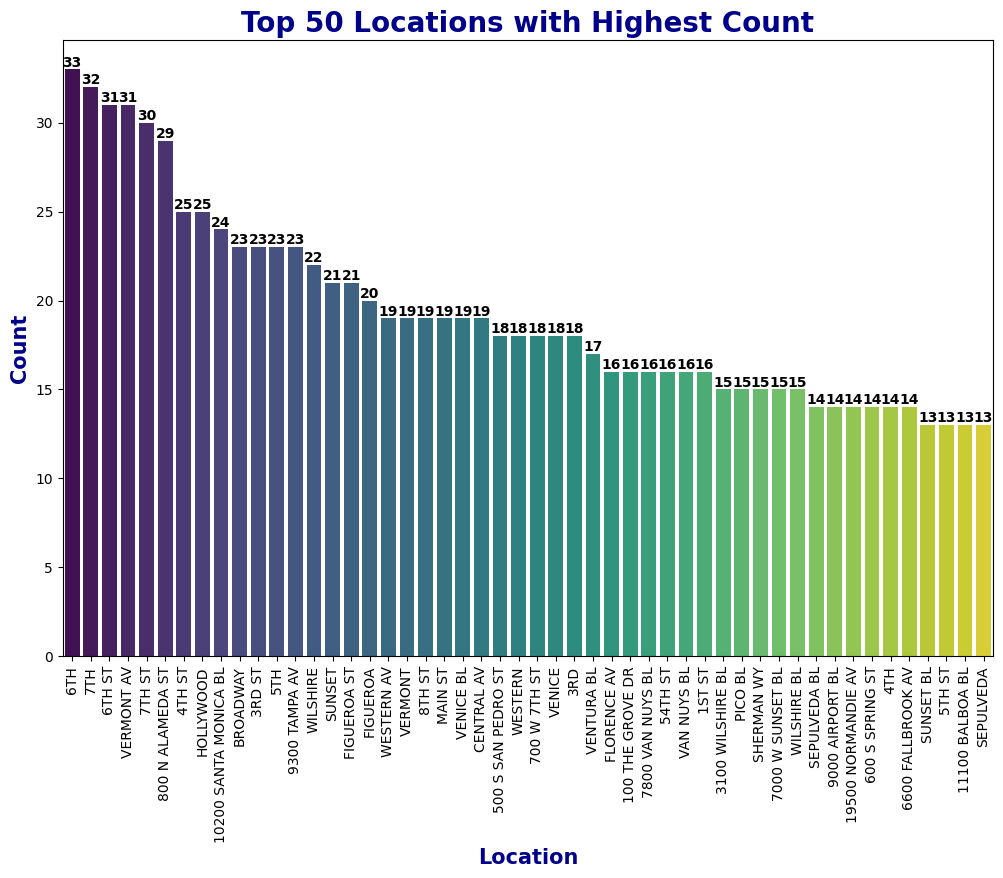

In [21]:
top_50_locations = train['Location'].value_counts()[:50]

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_50_locations.index, y=top_50_locations.values, palette='viridis')

plt.title('Top 50 Locations with Highest Count', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Location', fontsize=15, weight='bold', color='darkblue')
plt.ylabel('Count', fontsize=15, weight='bold', color='darkblue')
plt.xticks(rotation=90)

for index, value in enumerate(top_50_locations.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

#### Insights about the Location
* First 6 Locations has 30+ crime incidents. 
* One should add more cctv camera and increase the security level in these places the most

<hr>


<a id='h3-2.2'> </a>
## **Distribution of Part1-2**

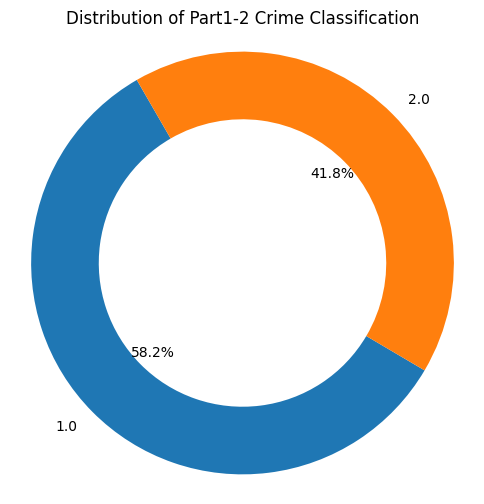

In [22]:
labels = train['Part 1-2'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=120, wedgeprops=dict(width=0.32))
ax.axis('equal')  
plt.title('Distribution of Part1-2 Crime Classification')
plt.show()


<hr>


<a id='h3-2.3'> </a>
## **Distribution of Crime Occurrence by Hour**

In [23]:
# making a bin of hour 0 to 23 
def crime_time(i):
    return i // 100

train['Crime_Time'] = (train['Time_Occurred'].astype(int)).apply(crime_time)

# applying same in test 
test['Crime_Time'] = (test['Time_Occurred'].astype(int)).apply(crime_time)

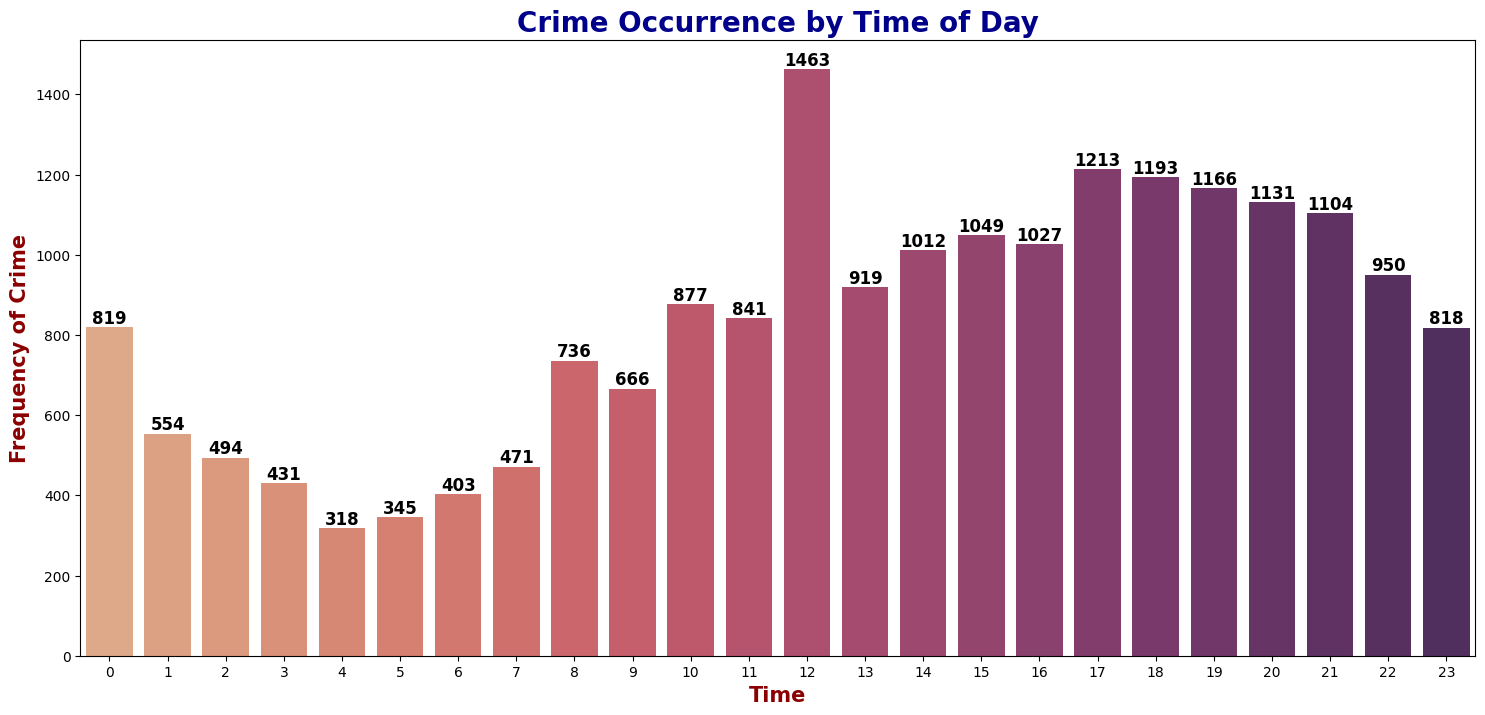

In [24]:
LL = train['Crime_Time'].value_counts().sort_index()

plt.figure(figsize=(18, 8))
sns.barplot(x=LL.index, y=LL.values, palette="flare")

plt.title('Crime Occurrence by Time of Day', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Time', fontsize=15, weight='bold', color='darkred')
plt.ylabel('Frequency of Crime', fontsize=15, weight='bold', color='darkred')

# writing the count of each bar for a clear understanding 
for index, value in enumerate(LL.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.show()

### Insights
* We can see that 1200 hour ( noon ) crime rate was the highest
* As well as, during late evening crime was in a higher percentage than morning

<hr>

<a id='h3-2.4'> </a>
## **Distribution of Crime Counts by Area Names**

In [25]:
train['Area_Name'].value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

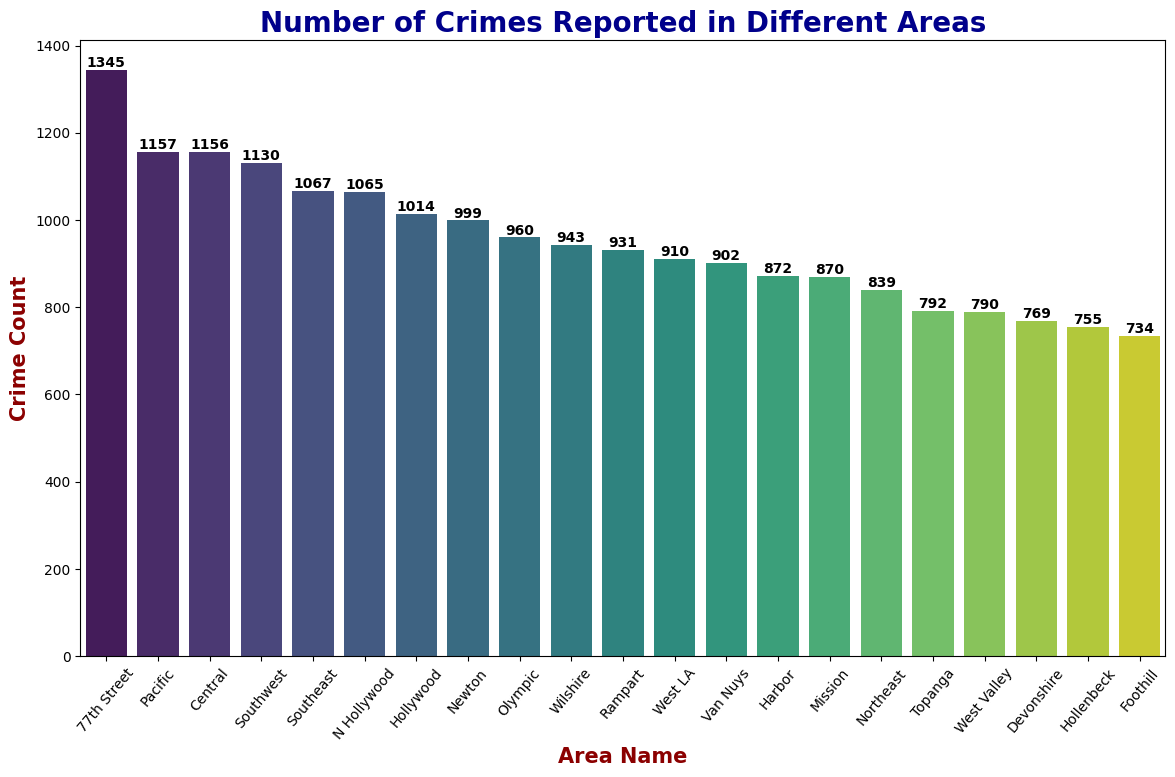

In [26]:
LL = train['Area_Name'].value_counts()

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x=LL.index, y=LL.values, palette='viridis')

plt.title('Number of Crimes Reported in Different Areas', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Area Name', fontsize=15, weight='bold', color='darkred')
plt.ylabel('Crime Count', fontsize=15, weight='bold', color='darkred')
plt.xticks(rotation=50)

for index, value in enumerate(LL.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()

### Insight
* Area with the highest crime rate: 77th Street has the highest number of crimes reported with 1345 cases.
* Areas with low crime rates: Foothill and Devonshire have the lowest number of crimes reported with 734 and 755 cases respectively.

<hr>

<a id='h3-2.5'> </a>
## **Visualization of Crime Reports by Reporting District**

In [27]:
train['Reporting_District_no'] = train['Reporting_District_no'].astype(str).str.replace('.0', '')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  object 
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

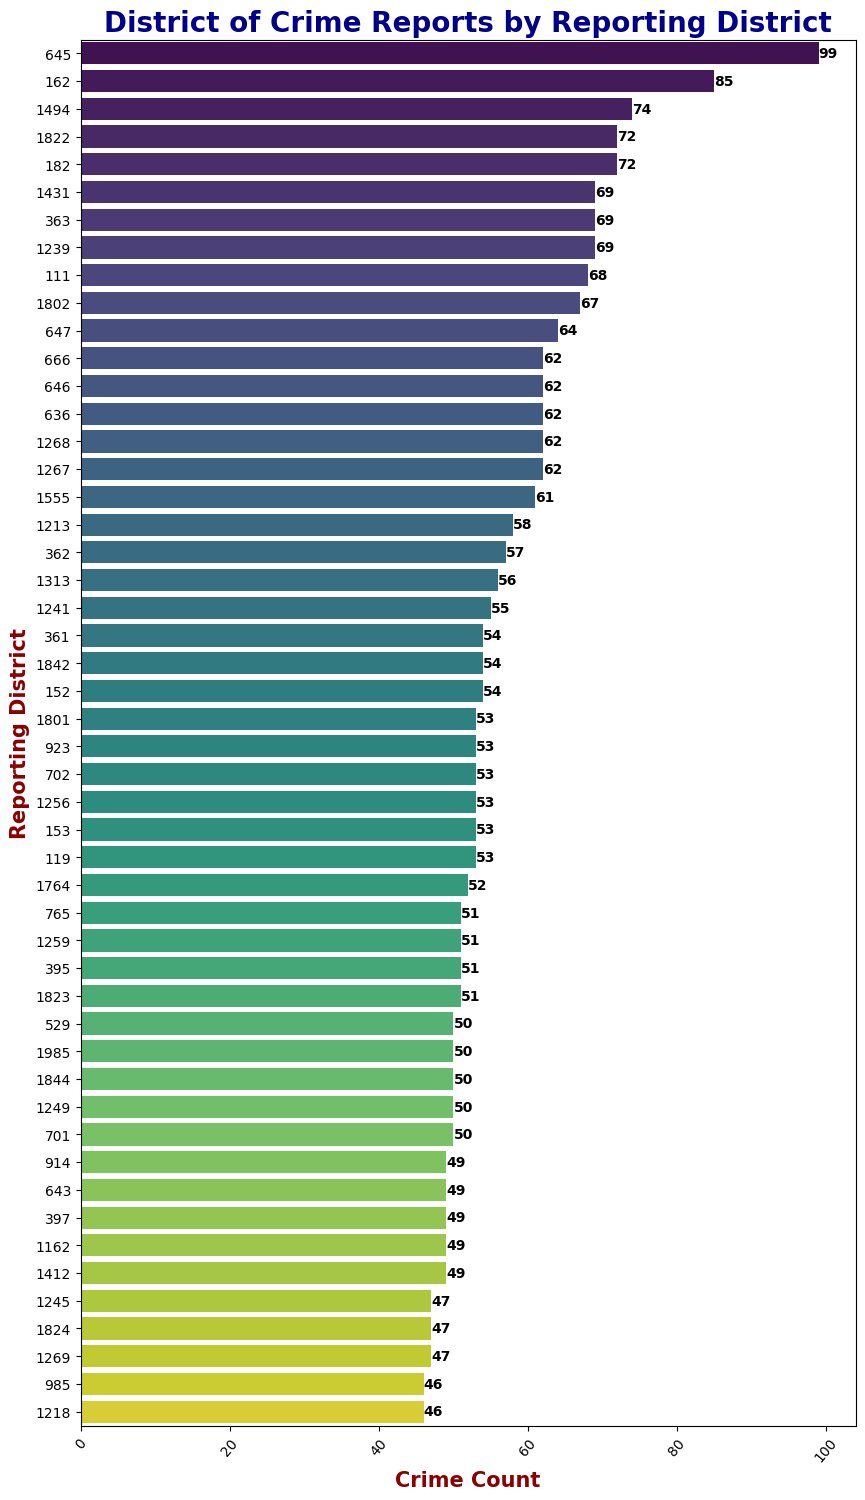

In [28]:
LL = train['Reporting_District_no'].value_counts()[:50]

plt.figure(figsize=(10, 18))
bar_plot = sns.barplot(y=LL.index, x=LL.values, palette='viridis')

plt.title('District of Crime Reports by Reporting District', fontsize=20, weight='bold', color='darkblue')
plt.ylabel('Reporting District', fontsize=15, weight='bold', color='darkred')
plt.xlabel('Crime Count', fontsize=15, weight='bold', color='darkred')
plt.xticks(rotation=50)

for index, value in enumerate(LL.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.show()

<hr>

<a id='h3-2.6'> </a>
## **Donut Chart Representation of Victim Sex Distribution**

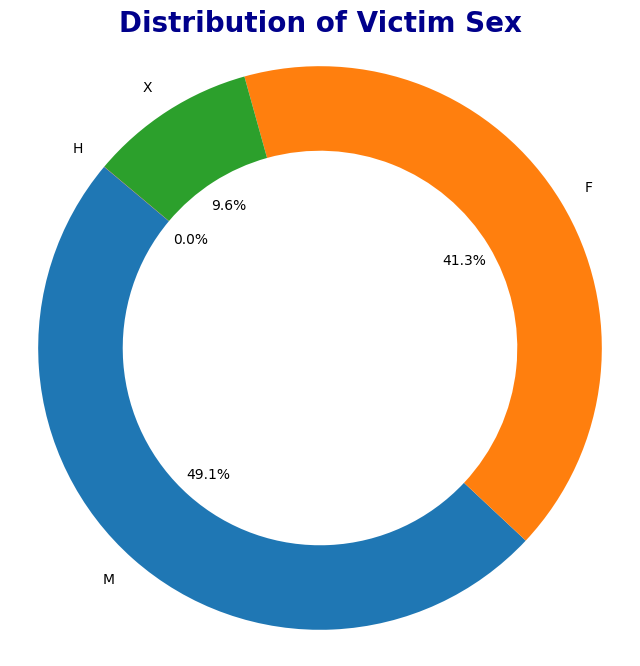

In [29]:
label_counts = train['Victim_Sex'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

ax.axis('equal')  
plt.title('Distribution of Victim Sex',fontsize=20, weight='bold', color='darkblue')
plt.show()


<hr>

<a id='h3-2.7'> </a>
## **Pie Chart Representation of Victim Age Distribution**

In [30]:
def age_category(i):
    if i > 0 and i <=25:
        return 'Young'
    elif i<=50:
        return 'Middle'
    else:
        return 'Old'
train['Age_Cat'] = train['Victim_Age'].apply(age_category)

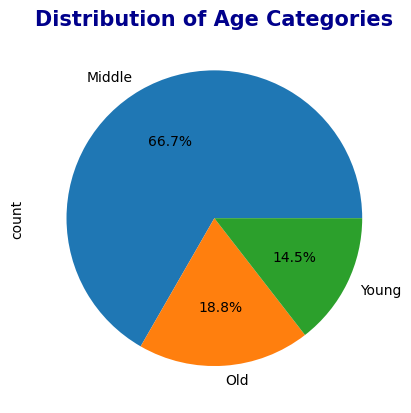

In [31]:
train['Age_Cat'].value_counts().plot(kind='pie',autopct='%1.1f%%')

ax.axis('equal')
plt.title('Distribution of Age Categories',fontsize=15, weight='bold', color='darkblue')
plt.show()

<hr>

<a id='h3-2.8'> </a>
## **Representation of Victim Descent in Bar plot and Word Cloud**

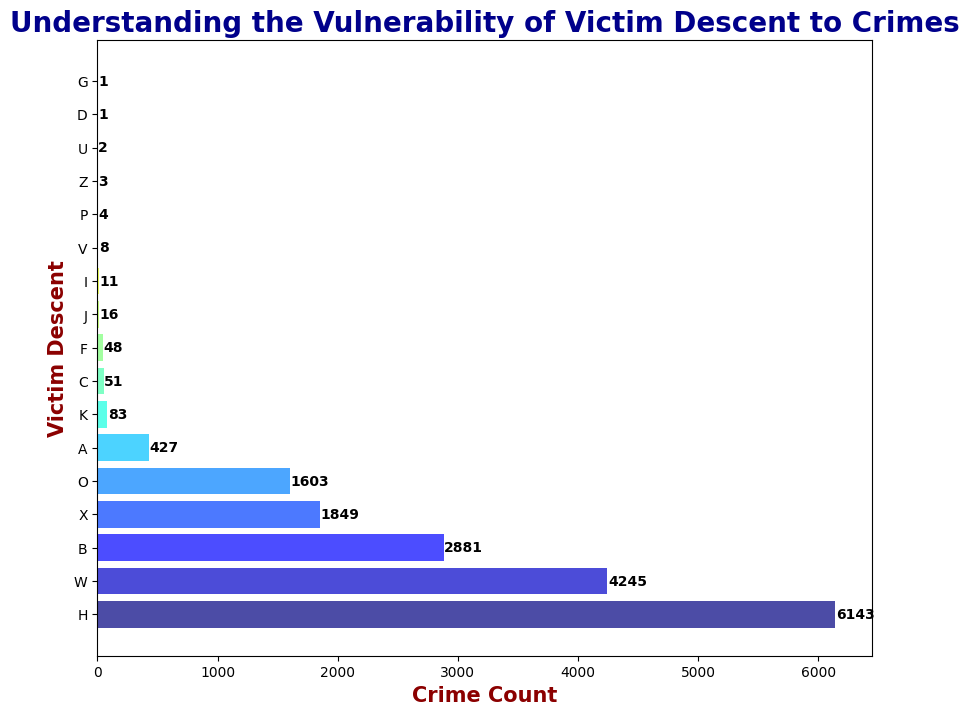

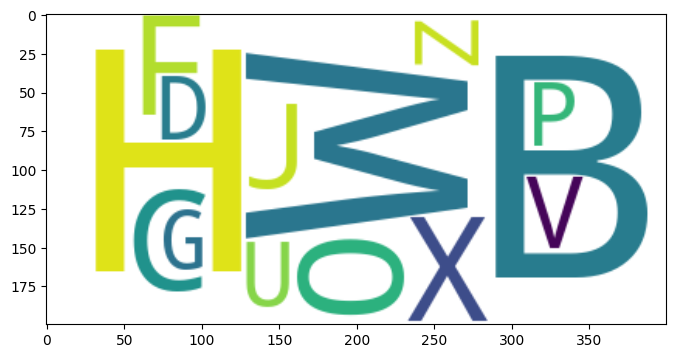

In [32]:
from wordcloud import WordCloud
LL = train['Victim_Descent'].value_counts()[:50]

plt.figure(figsize=(10, 8))

colors = plt.cm.jet(np.linspace(0, 1, len(LL)))
plt.barh(LL.index, LL.values, color=colors, alpha=0.7)

plt.title('Understanding the Vulnerability of Victim Descent to Crimes', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Crime Count', fontsize=15, weight='bold', color='darkred')
plt.ylabel('Victim Descent', fontsize=15, weight='bold', color='darkred')

for index, value in enumerate(LL.values):
    plt.text(value + 5, index, str(value), ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.show()

plt.figure(figsize=(8, 8))

# Generate a word cloud from the modus operandi codes
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(LL.index))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')

<hr>

<a id='h3-2.9'> </a>
## **Bar Plot Representation of Top 20 Modus Operandi**

In [33]:
train['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [34]:
train['Modus_Operandi'] = train['Modus_Operandi'].fillna('')
all_codes = train['Modus_Operandi'].str.split().explode().reset_index(drop=True)
modus_operandi_counts = all_codes.value_counts()
modus_operandi_counts

Modus_Operandi
1822    5904
0344    5880
0913    3344
0329    2878
0416    2803
        ... 
0391       1
1410       1
0115       1
0362       1
0425       1
Name: count, Length: 481, dtype: int64

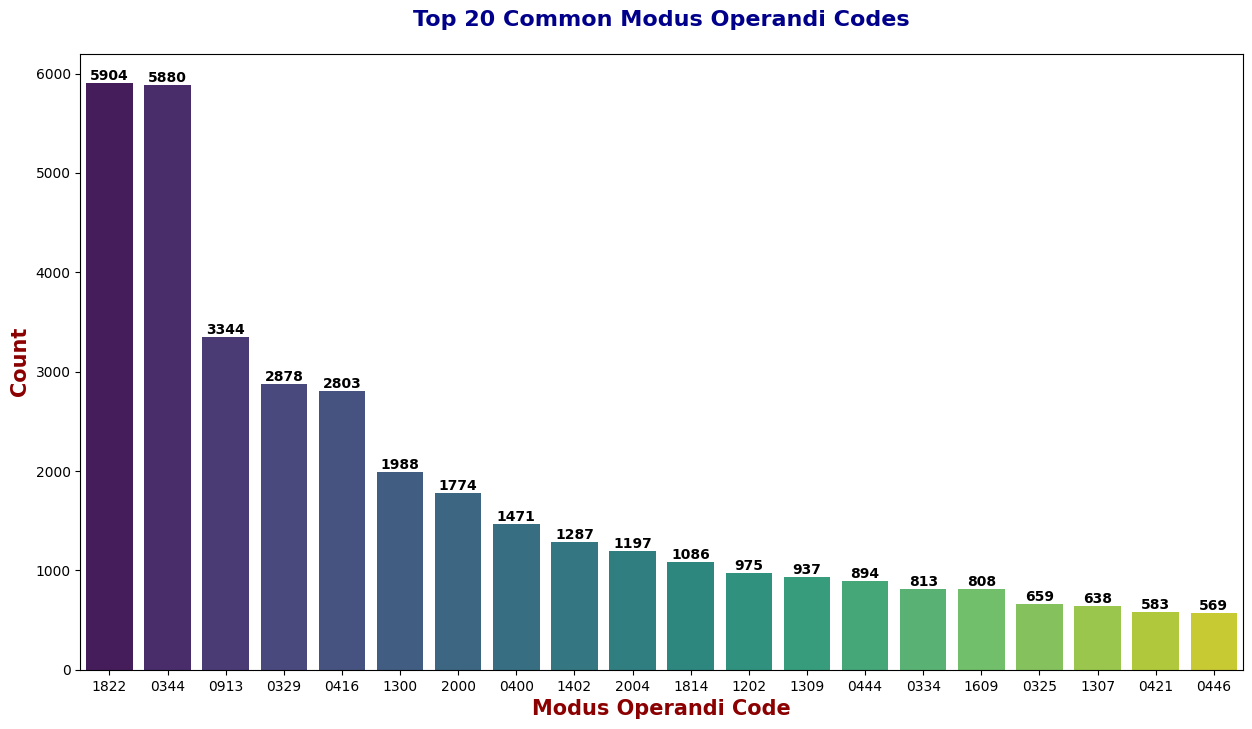

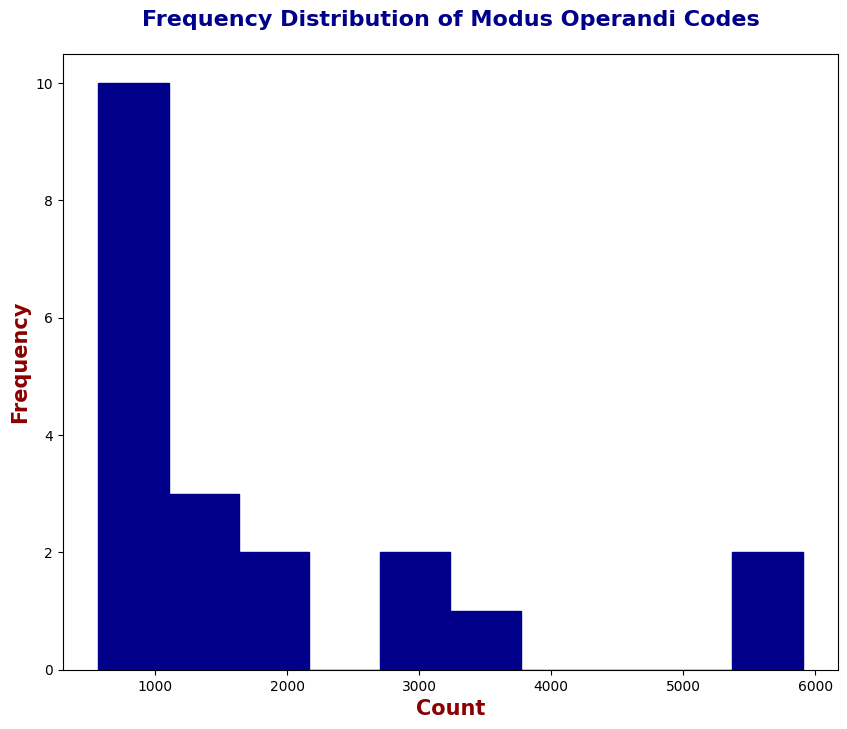

In [35]:
LL = modus_operandi_counts[:20]

plt.figure(figsize=(15, 8))
sns.barplot(x=LL.index, y=LL.values, palette='viridis')

plt.title('Top 20 Common Modus Operandi Codes', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Modus Operandi Code', fontsize=15, weight='bold', color='darkred')
plt.ylabel('Count', fontsize=15, weight='bold', color='darkred')

for index, value in enumerate(modus_operandi_counts.values[:20]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()
plt.figure(figsize=(10, 8))

# Create a histogram of the modus operandi counts
plt.hist(LL.values, bins=10, color='darkblue', edgecolor='darkblue')

plt.title('Frequency Distribution of Modus Operandi Codes', fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Count', fontsize=15, weight='bold', color='darkred')
plt.ylabel('Frequency', fontsize=15, weight='bold', color='darkred')

plt.show()

### Insights
* #### Together, these graphs provide a more comprehensive understanding of the MO codes used in crimes. 
    * #### The bar chart highlights the most frequent MO codes
    * #### While the histogram reveals the distribution of counts across all MO codes.
* #### For example, the bar chart might show that MO code 1822 is the most common, but the histogram might indicate that there are many MO codes with a relatively low number of crimes associated with them.

<hr>

<a id='h3-2.10'> </a>
## **Bar Plot Representation of Top 30 Premise Code**

In [36]:
train['Premise_Code'].value_counts().sort_values

<bound method Series.sort_values of Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64>

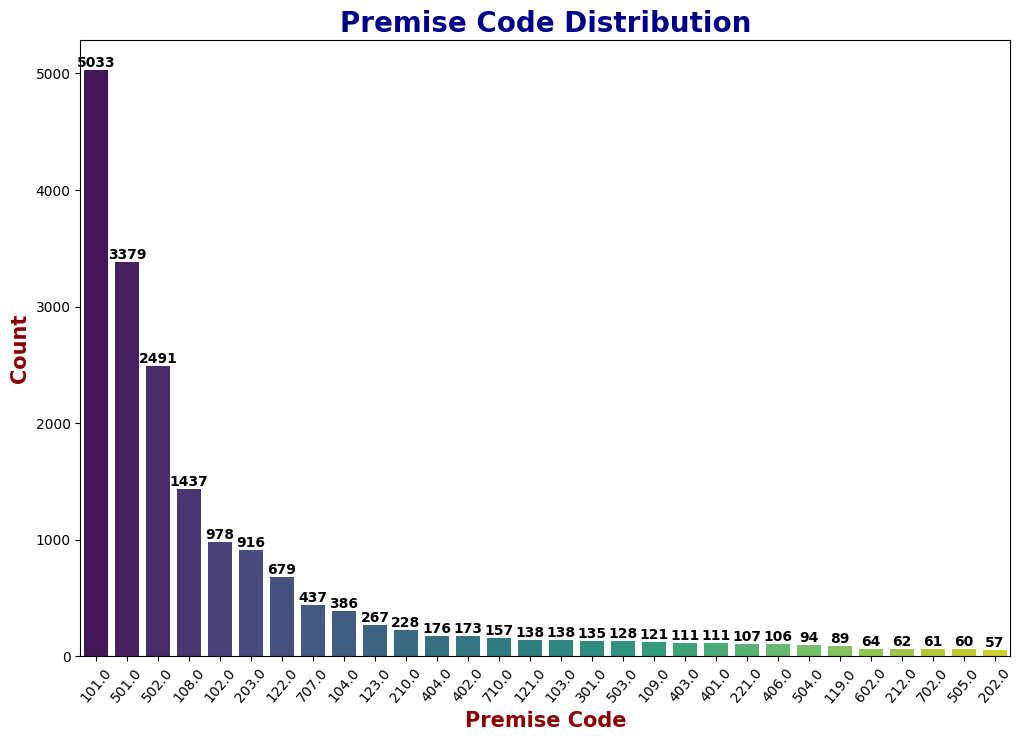

In [37]:
premise_code_counts = train['Premise_Code'].astype(str).value_counts()[:30]

plt.figure(figsize=(12, 8))
sns.barplot(x=premise_code_counts.index, y=premise_code_counts.values, palette='viridis')

plt.title('Premise Code Distribution', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Premise Code', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='darkred')
plt.xticks(rotation=50)

for index, value in enumerate(premise_code_counts.values[:30]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.show()


<hr>

<a id='h3-2.11'> </a>
## **Percentage Distribution of Different Statuses**

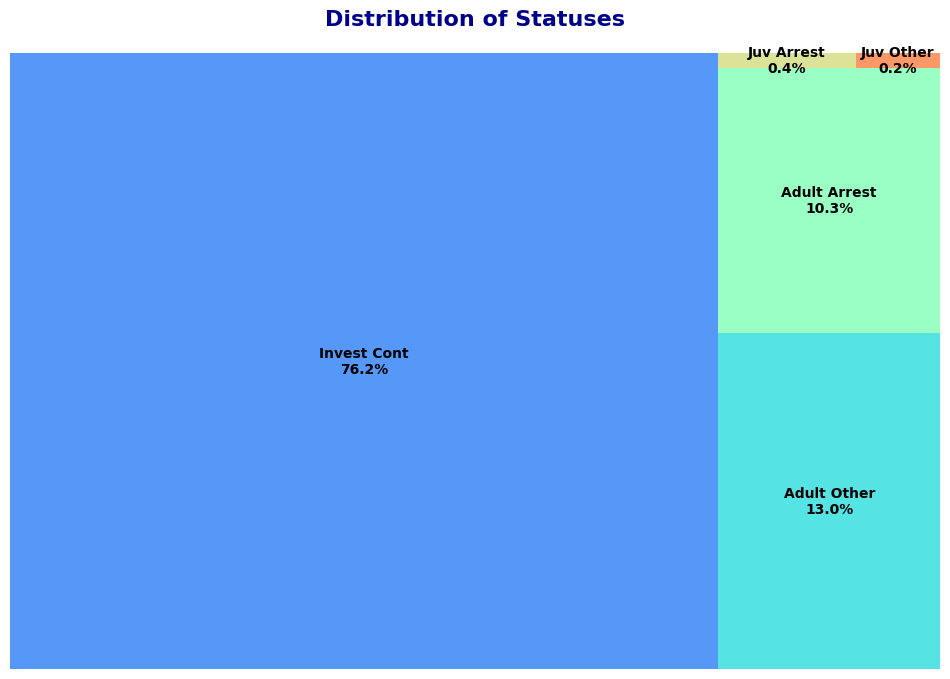

In [38]:
status_counts = train['Status'].value_counts()
status_percentages = (status_counts / status_counts.sum()) * 100

labels = [f'{status}\n{percentage:.1f}%' for status, percentage in zip(train['Status_Description'].value_counts().index, status_percentages)]
plt.figure(figsize=(12, 8))

colors = sns.color_palette("rainbow", 5)
squarify.plot(sizes=status_counts.values, label=labels, alpha=0.8,color=colors, text_kwargs={'fontsize':10, 'weight':'bold'})
plt.title('Distribution of Statuses', fontsize=16, fontweight='bold', color='Darkblue', pad=20)
plt.axis('off')  
plt.show()


<hr size="7%" noshade>

<a id='h3-3'> </a>
## Derived columns 


In [39]:
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])

# Applying same to test dataset 
test['Date_Reported'] = pd.to_datetime(test['Date_Reported'])
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'])
train[['Date_Reported', 'Date_Occurred']].head()

/tmp/ipykernel_33/342318978.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])
/tmp/ipykernel_33/342318978.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])
/tmp/ipykernel_33/342318978.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date_Reported'] = pd.to_datetime(test['Date_Reported'])
/tmp/ipykernel_33/342318978.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ens

,Date_Reported,Date_Occurred
0,2020-03-09,2020-03-06
1,2020-02-27,2020-02-27
2,2020-08-21,2020-08-21
3,2020-11-08,2020-11-06
4,2020-02-25,2020-02-25


In [40]:
train['Duration'] = (train['Date_Reported'] - train['Date_Occurred'])
train['Duration'] = train['Duration'].dt.days

# Applying same to test dataset
test['Duration'] = (test['Date_Reported'] - test['Date_Occurred'])
test['Duration'] = test['Duration'].dt.days
type(train['Duration'])

pandas.core.series.Series

In [41]:
train['Year_Reported'] = train['Date_Reported'].dt.year
train['Month_Reported'] = train['Date_Reported'].dt.month
train['Day_Reported'] = train['Date_Reported'].dt.day

train['Year_Occurred'] = train['Date_Occurred'].dt.year
train['Month_Occurred'] = train['Date_Occurred'].dt.month
train['Day_Occurred'] = train['Date_Occurred'].dt.day


# Applying same in test dataset 
test['Year_Reported'] = test['Date_Reported'].dt.year
test['Month_Reported'] = test['Date_Reported'].dt.month
test['Day_Reported'] = test['Date_Reported'].dt.day

test['Year_Occurred'] = test['Date_Occurred'].dt.year
test['Month_Occurred'] = test['Date_Occurred'].dt.month
test['Day_Occurred'] = test['Date_Occurred'].dt.day

In [42]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Target_Label,Crime_Time,Age_Cat,Duration,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563,...,4,18,Old,3,2020,3,9,2020,3,6
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367,...,4,13,Middle,0,2020,2,27,2020,2,27
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,Newton,1343,...,4,6,Old,0,2020,8,21,2020,8,21
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924,...,4,18,Old,2,2020,11,8,2020,11,6
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245,...,4,11,Middle,0,2020,2,25,2020,2,25


<hr >

<a id='h3-4'> </a>
# Multivariate Analysis 

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               20000 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               20000 non-null  float64       
 3   Longitude              20000 non-null  float64       
 4   Date_Reported          20000 non-null  datetime64[ns]
 5   Date_Occurred          20000 non-null  datetime64[ns]
 6   Time_Occurred          20000 non-null  float64       
 7   Area_ID                20000 non-null  float64       
 8   Area_Name              20000 non-null  object        
 9   Reporting_District_no  20000 non-null  object        
 10  Part 1-2               20000 non-null  float64       
 11  Modus_Operandi         20000 non-null  object        
 12  Victim_Age             20000 non-null  float64       
 13  V

<a id='h3-4.01'> </a>
## **Crime Category Distribution by Victim Sex** 

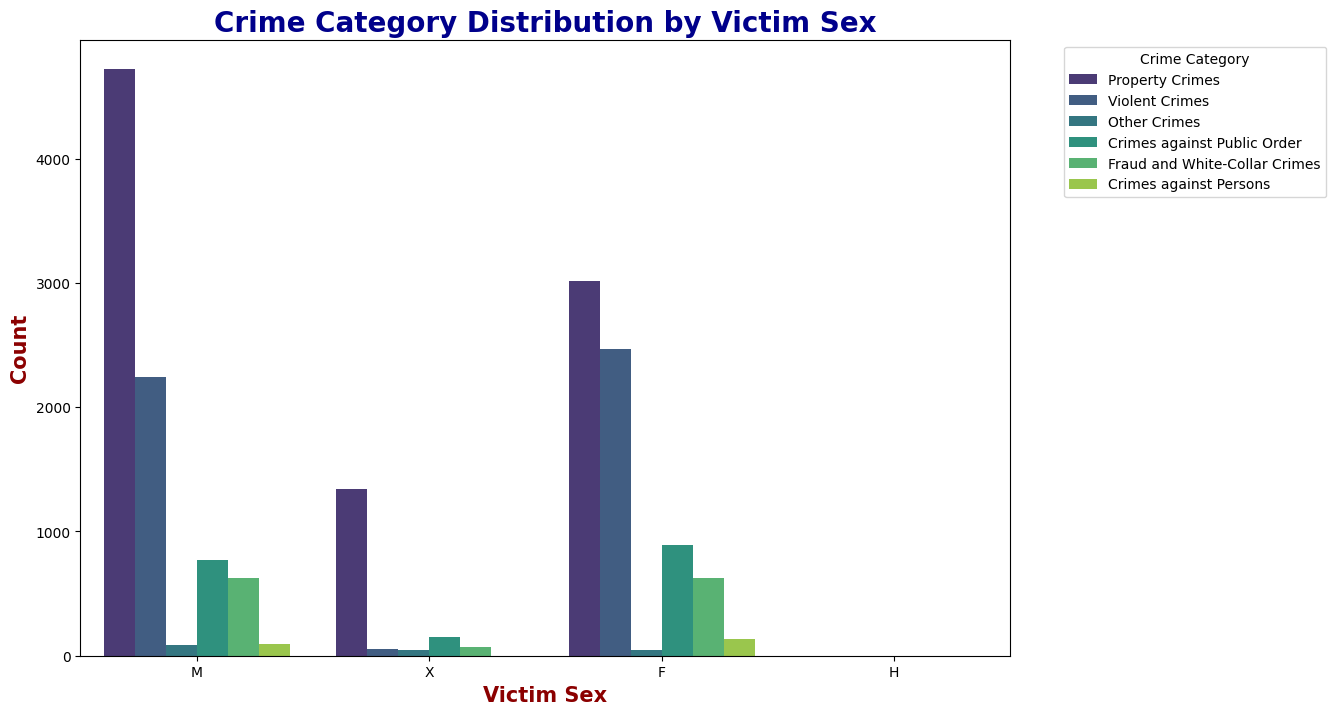

In [44]:
train.groupby('Victim_Sex')['Crime_Category'].value_counts(normalize=True).to_frame()*100

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=train, x='Victim_Sex', hue='Crime_Category', palette='viridis')

plt.title('Crime Category Distribution by Victim Sex', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Victim Sex', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='darkred')

plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights
* #### Distribution Across Victim_Sex Doesn't seem to effect the Target Variable

<hr>


<a id='h3-4.02'> </a>
## **Crime Rate Distribution by Neighborhood**

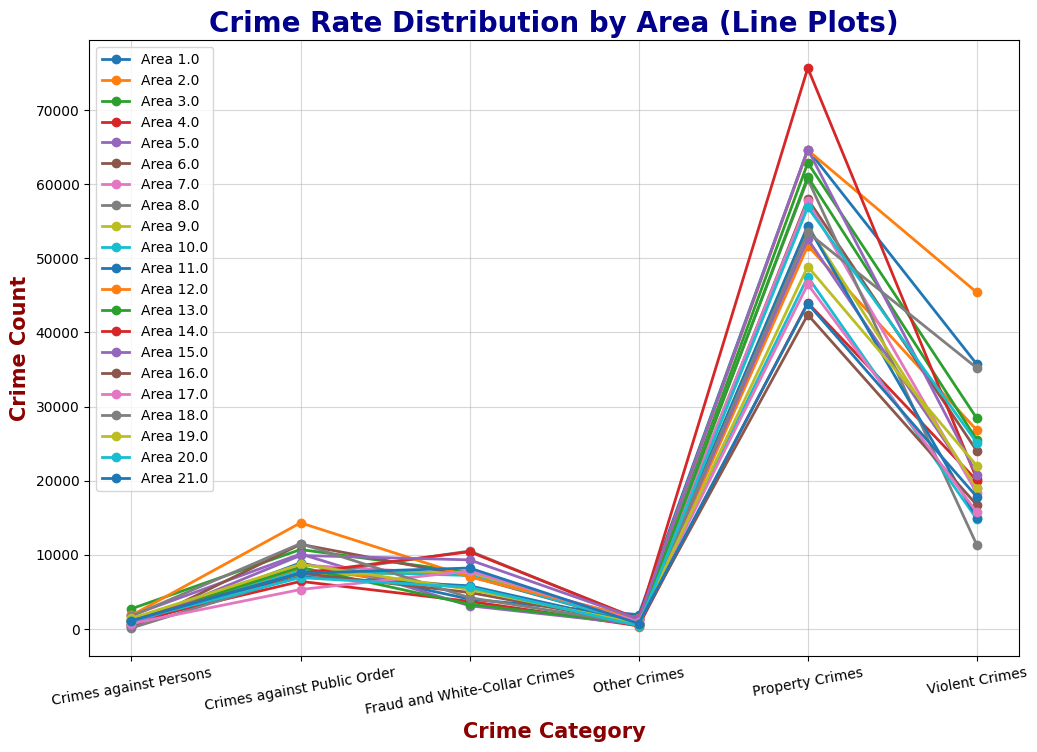

In [45]:
brain = train.groupby('Area_ID')['Crime_Category'].value_counts(normalize=False).unstack().fillna(0) * 100

plt.figure(figsize=(12, 8))
for i, row in brain.iterrows():
    plt.plot(row.index, row.values, label=f'Area {i}', marker='o', linestyle='-', linewidth=2)

plt.title('Crime Rate Distribution by Area (Line Plots)', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Crime Category', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Crime Count', fontsize=15, fontweight='bold', color='darkred')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.5)
plt.xticks(rotation=10)
colors = plt.cm.jet(np.linspace(0, 1, len(LL)))
plt.gca().set_prop_cycle(color=colors) 

plt.show()

### Insights
* #### Variability Across Areas: The crime rates vary significantly across different areas. Some areas have consistently high crime rates, while others have relatively low ones.
* #### Crime Category Trends: The shape of the lines for each area suggests different patterns for different crime categories.
    * Violent Crimes: Areas 1.0, 2.0, and 3.0 have particularly high rates of violent crimes.
    * Property Crimes: Most areas have a relatively high number of property crimes. Ares 4 is the highest.
    * Fraud and White-Collar Crimes: This category generally has lower rates compared to others. Area 4 is still the highest.
    * Crimes Against Public Order: The rates for these crimes are also relatively low. Area 12 is the highest
* #### Peak and Trough Patterns: Some areas exhibit peak and trough patterns in specific crime categories. For instance, Area 1.0 has a sharp peak in violent crimes but a relatively low rate of property crimes.
<hr>

<a id='h3-4.03'> </a>
## **Vulnerability by Age, Sex, and Crime Type**

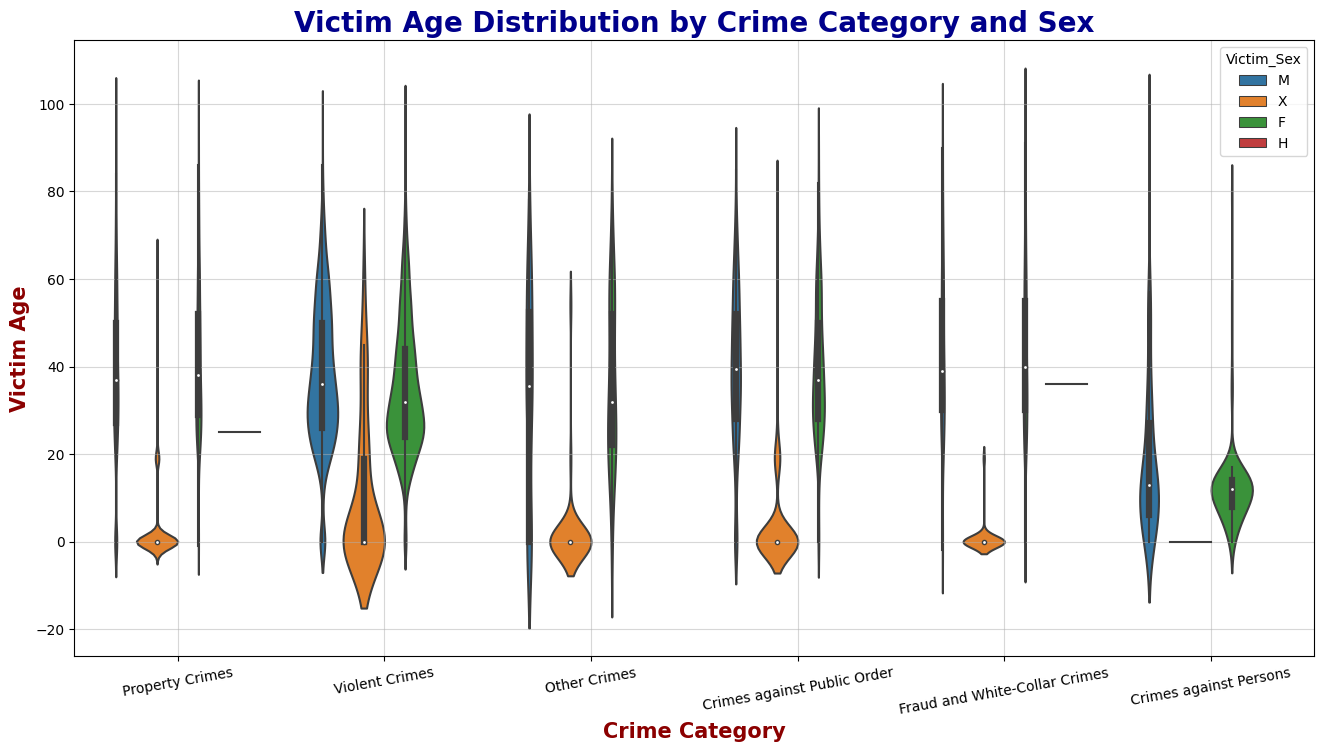

In [46]:
plt.figure(figsize=(16, 8))
sns.violinplot(x='Crime_Category', y='Victim_Age', hue='Victim_Sex', data=train)
plt.title('Victim Age Distribution by Crime Category and Sex', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Crime Category', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Victim Age', fontsize=15, fontweight='bold', color='darkred')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=10)
plt.show()

### Insights
* #### A more detailed view of the age distribution of victims within each crime category and sex, helping to identify potential patterns and vulnerabilities.
    * #### Age-Related Patterns
        * Younger Victims: Violent crimes, property crimes, and crimes against public order often have a higher concentration of younger victims. This suggests that youth may be particularly vulnerable to these types of crimes.
        * Older Victims: Crimes against persons, especially fraud and white-collar crimes, tend to target older individuals. This could be due to factors like financial vulnerability or decreased physical capabilities.
    * #### Gender-Related Patterns
        * Male Victims: Men are more likely to be victims of violent and property crimes.
        * Female Victims: Women are more frequently victims of crimes against persons, particularly fraud and white-collar crimes.
    * #### Crime Category-Specific Vulnerabilities
        * Violent Crimes: Younger individuals, particularly males, may be more susceptible.
        * Property Crimes: Younger individuals might be more vulnerable.
        * Fraud and White-Collar Crimes: Older individuals, especially those with financial resources, may be targeted due to their perceived vulnerability and trust.


<hr>

<a id='h3-4.04'> </a>
## **How Weapon Use Varies Across Different Crimes**

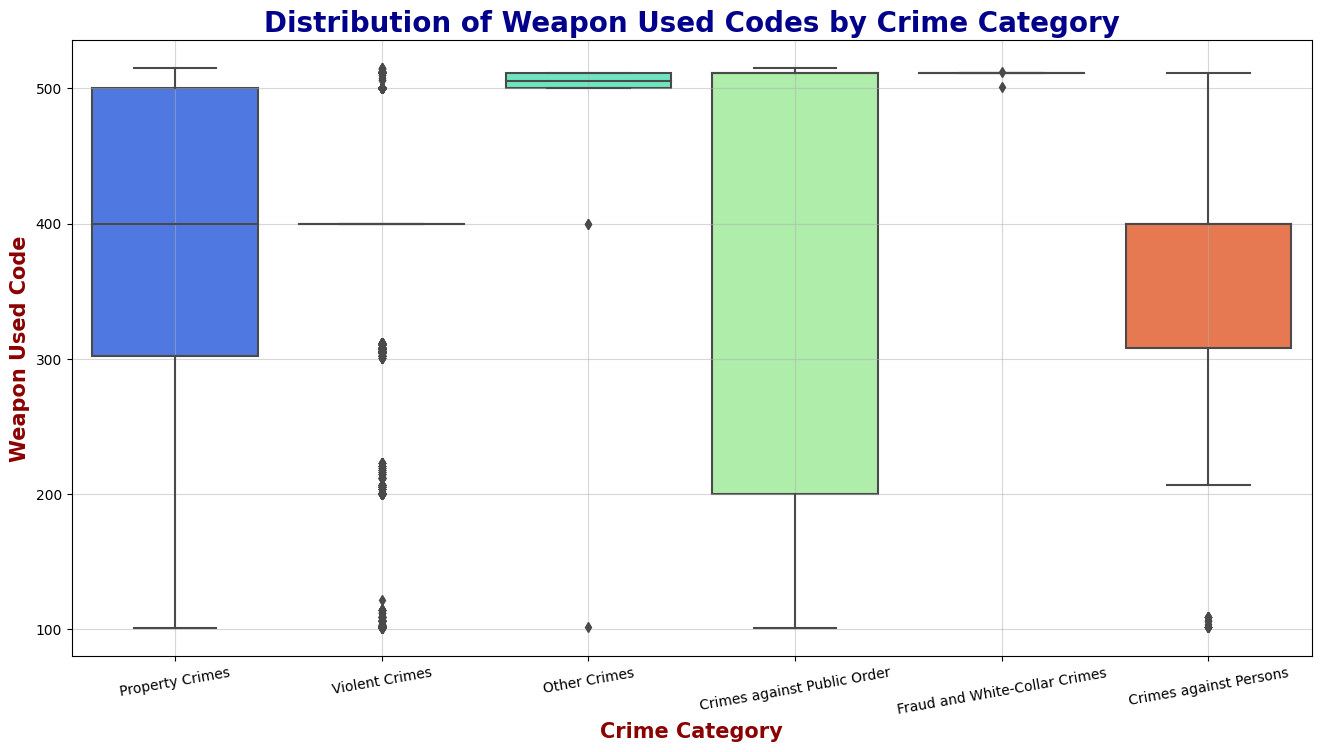

In [47]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Crime_Category', y='Weapon_Used_Code', data=train, palette='rainbow')
plt.title('Distribution of Weapon Used Codes by Crime Category', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Crime Category', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Weapon Used Code', fontsize=15, fontweight='bold', color='darkred')
plt.grid(True, alpha=0.5)
plt.xticks(rotation=10)
plt.show()

### Insights
* #### The choice of weapon often correlates with the type of crime. For instance, property crimes and violent crimes tend to involve more dangerous weapons.
    * Property Crimes: The box is wider, indicating a larger spread in weapon codes used.
    * Violent Crimes: Insufficient data to predict.
    * Other Crimes: The box is narrower, suggesting less variability in weapon usage.
    * Fraud and White-Collar Crimes: Insufficient data to predict.
    * Crimes Against Persons: There's a moderate spread in weapon codes, with some outliers.
    
<hr>

<a id='h3-4.05'> </a>
## **Status Varying Across Different Crimes**

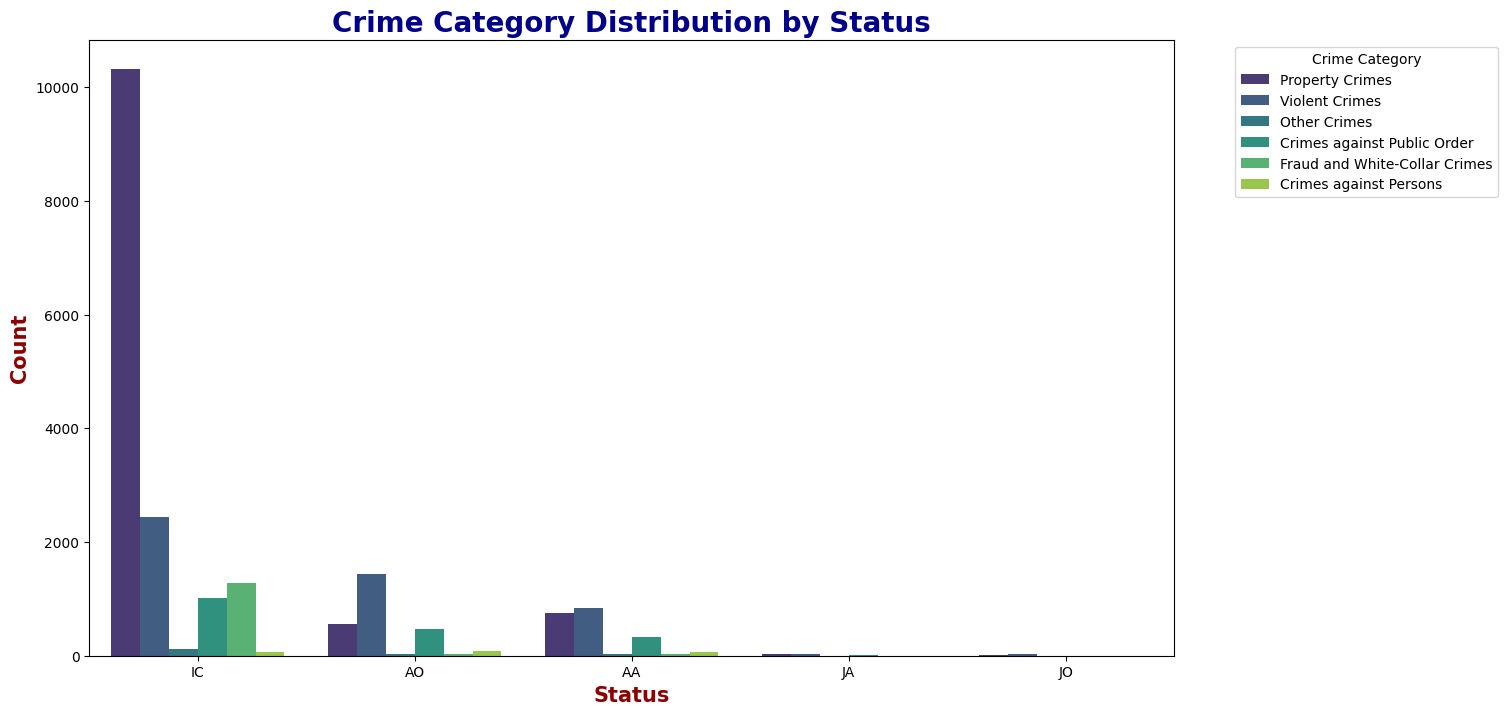

In [48]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=train, x='Status', hue='Crime_Category', palette='viridis')

plt.title('Crime Category Distribution by Status', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Status', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='darkred')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<hr>

<a id='h3-4.1'> </a>
## **Correlation between new numerical features** 

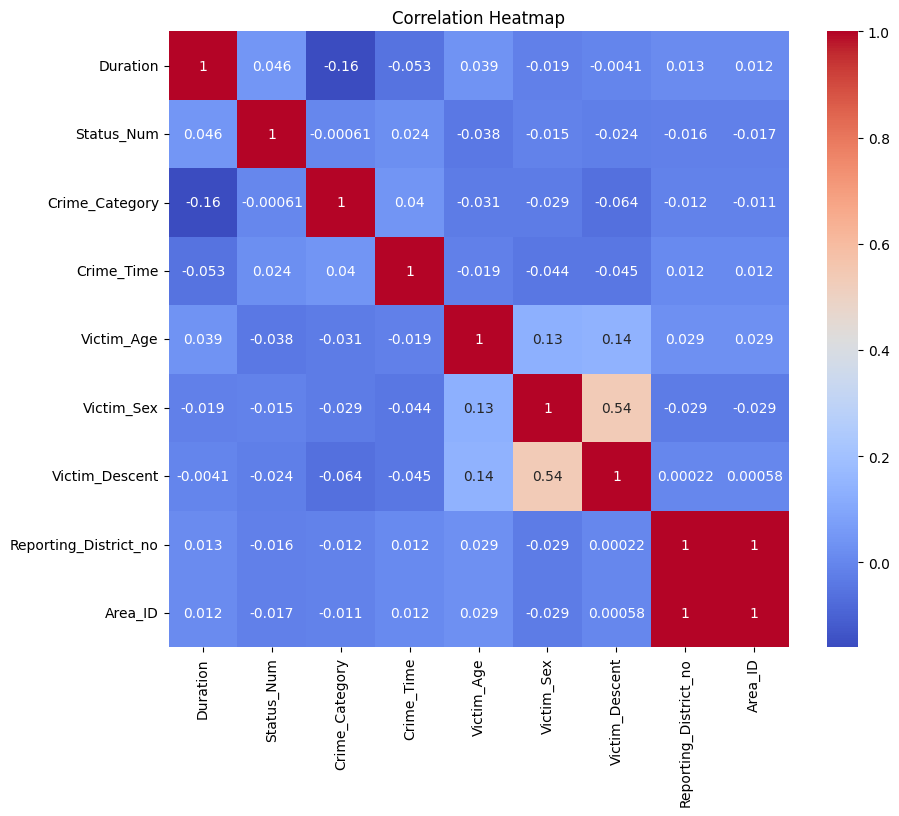

In [49]:
train['Status_Num'] = train['Status'].astype('category').cat.codes
train['Victim_Sex_Label'] = train['Victim_Sex'].astype('category').cat.codes
train['Victim_Descent_Label'] = train['Victim_Descent'].astype('category').cat.codes

#Applying same
test['Status_Num'] = test['Status'].astype('category').cat.codes
test['Victim_Sex_Label'] = test['Victim_Sex'].astype('category').cat.codes
test['Victim_Descent_Label'] = test['Victim_Descent'].astype('category').cat.codes


correlation_data = {
    'Duration': train['Duration'],
    'Status_Num': train['Status_Num'],
    'Crime_Category': train['Target_Label'],
    'Crime_Time': train['Crime_Time'],
    'Victim_Age': train['Victim_Age'],
    'Victim_Sex': train['Victim_Sex_Label'],
    'Victim_Descent': train['Victim_Descent_Label'],
    'Reporting_District_no': train['Reporting_District_no'],
    'Area_ID': train['Area_ID']
}

correlation_df = pd.DataFrame(correlation_data)

corr_matrix = correlation_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights
* Area_ID and Reporting_District is always the same
* Also it can be noted that sex and descent of the victim is positive correlated 


<hr>

<a id='h3-4.2'> </a>
### **Relationship Between Reported and Occurred Crime Dates** 

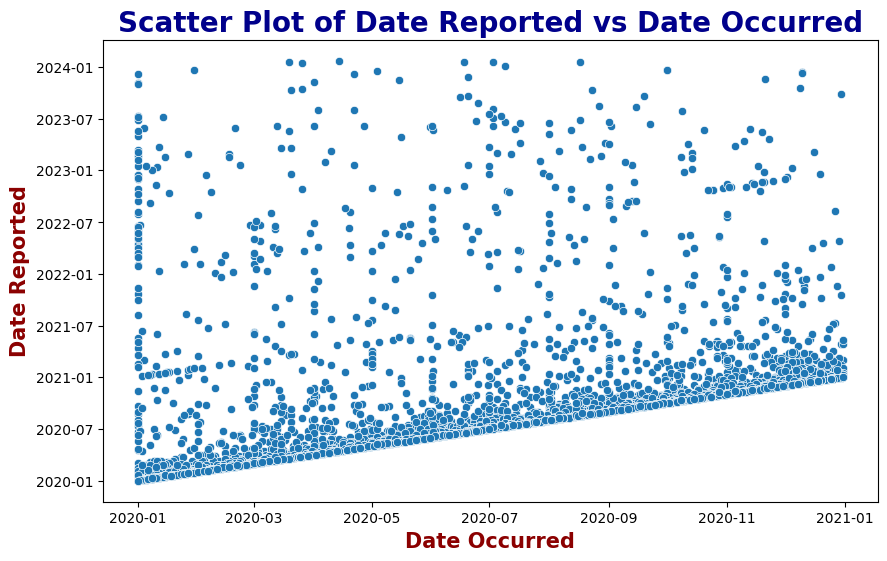

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['Date_Occurred'], y=train['Date_Reported'])

plt.title('Scatter Plot of Date Reported vs Date Occurred' , fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Date Occurred' , fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Date Reported' , fontsize=15, fontweight='bold', color='darkred')
plt.show()

### Insights
* This gives a clear idea about the difference between date occurred and reported. 
* Most of crimes were reported as soon as they were occurred.
* Some crimes which happened in 2020 took long time to be reported.


<hr>

<a id='h3-4.3'> </a>
## **Visualization of Crime Reports Over Different Years** 

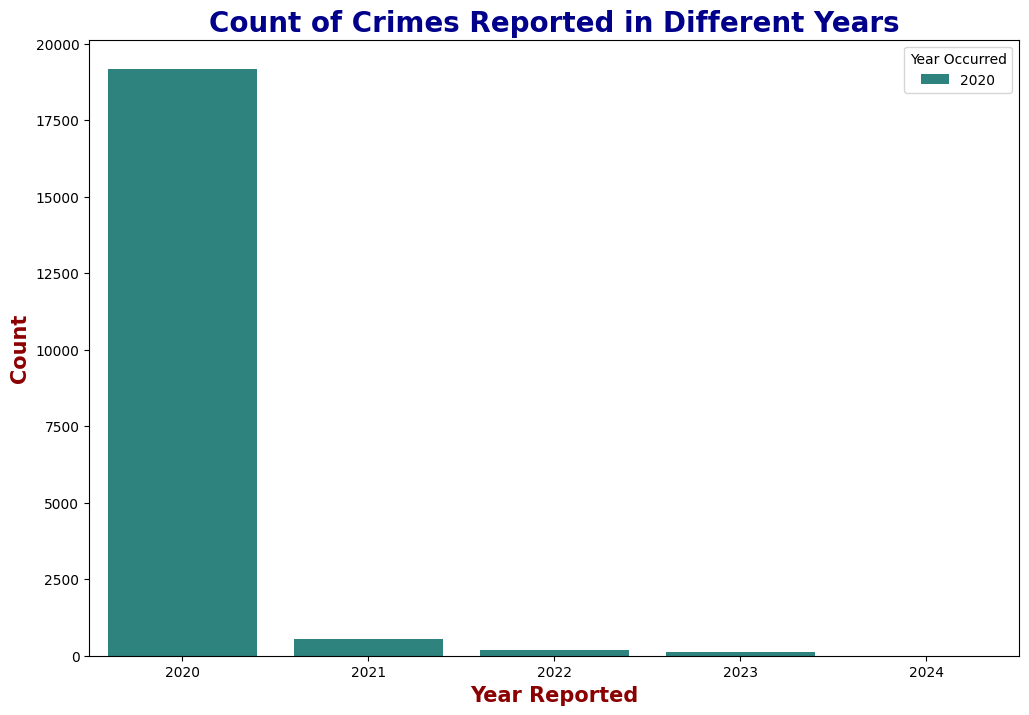

In [51]:
pivot_table = train.pivot_table(index='Year_Occurred', columns='Year_Reported', aggfunc='size', fill_value=0)

pivot_df = pivot_table.reset_index().melt(id_vars='Year_Occurred', var_name='Year_Reported', value_name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Year_Reported', y='Count', hue='Year_Occurred', data=pivot_df, palette='viridis')

plt.title('Count of Crimes Reported in Different Years' , fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Year Reported' , fontsize= 15, fontweight='bold', color='darkred')
plt.ylabel('Count' , fontsize=15, fontweight='bold', color='darkred')
plt.legend(title='Year Occurred')

plt.show()

### Insights 
* All crimes were occurred in the year 2020 
* Most of the crimes were reported in 2020 itself 
* Some cases were reported late 
* We can further check what were the crimes that was reported late 


<hr>

<a id='h3-4.4'> </a>
## **Analyzing Monthly and Yearly Incident Reporting Trends in Data** 

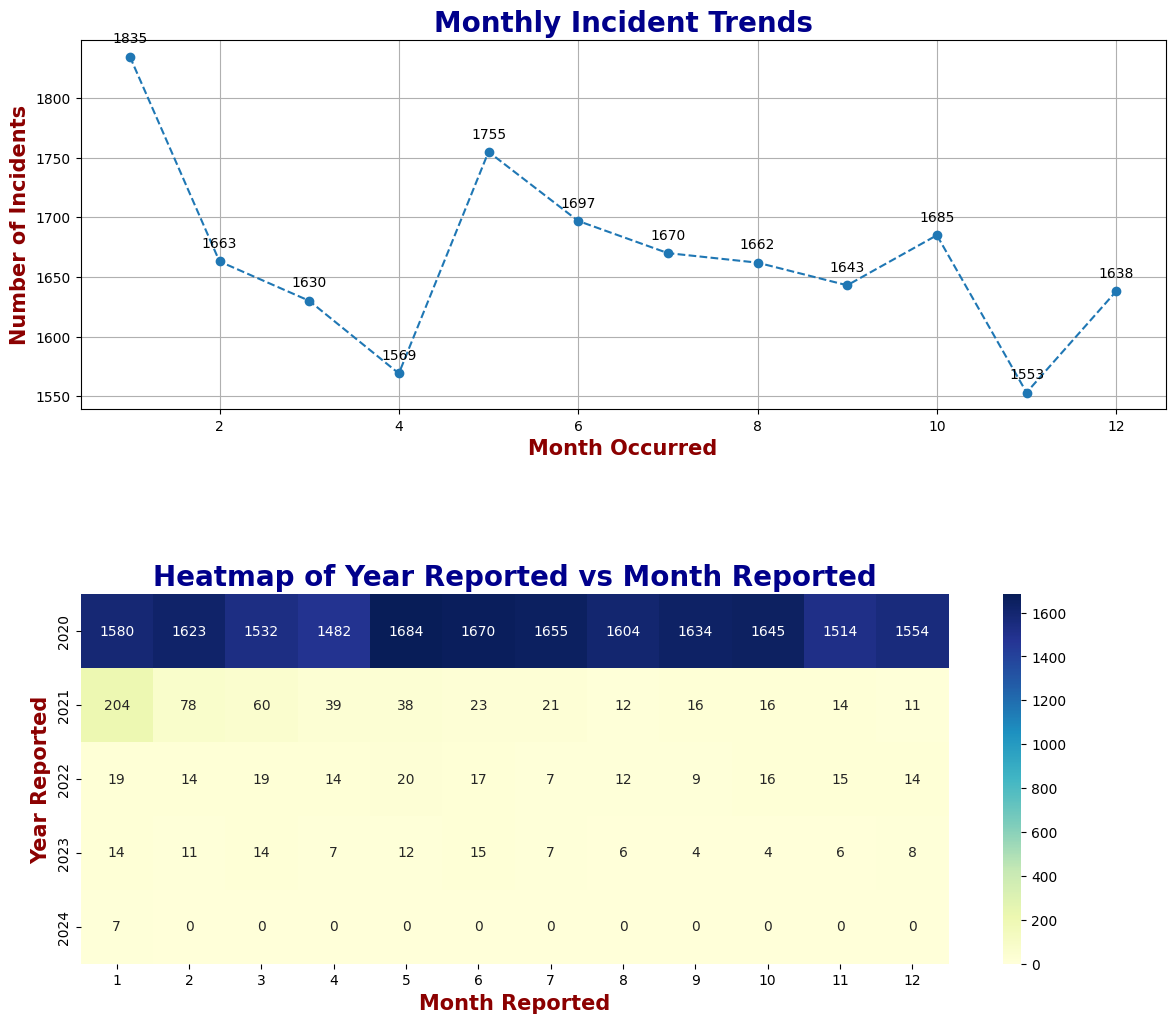

In [52]:
# Create subplots for Heatmap by Month occurred and Year Reported
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'hspace': 0.5})

month_occurrence_data = train.groupby('Month_Occurred').size()
# Line Chart for Month Occurred in 2020
ax1.plot(month_occurrence_data.index, month_occurrence_data.values, marker='o', linestyle='--')
ax1.set_title('Monthly Incident Trends', fontsize=20, fontweight='bold', color='darkblue')
ax1.set_xlabel('Month Occurred', fontsize=15, fontweight='bold', color='darkred')
ax1.set_ylabel('Number of Incidents', fontsize=15, fontweight='bold', color='darkred')
ax1.grid(True)
for i, txt in enumerate(month_occurrence_data.values):
    ax1.annotate(txt, (month_occurrence_data.index[i], month_occurrence_data.values[i]), textcoords="offset points", xytext=(0,10), ha='center')


# Heatmap of Year Reported vs Month Reported
heatmap_data_reported = train.pivot_table(index='Year_Reported', columns='Month_Reported', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data_reported, cmap='YlGnBu', annot=True, fmt='d', ax=ax2)
ax2.set_title('Heatmap of Year Reported vs Month Reported', fontsize=20, fontweight='bold', color='darkblue')
ax2.set_xlabel('Month Reported', fontsize=15, fontweight='bold', color='darkred')
ax2.set_ylabel('Year Reported', fontsize=15, fontweight='bold', color='darkred')

plt.show()

<a id='h3-4.5'> </a>
### **Frequency of Occurred Month vs Reported Month in the Same Year** 

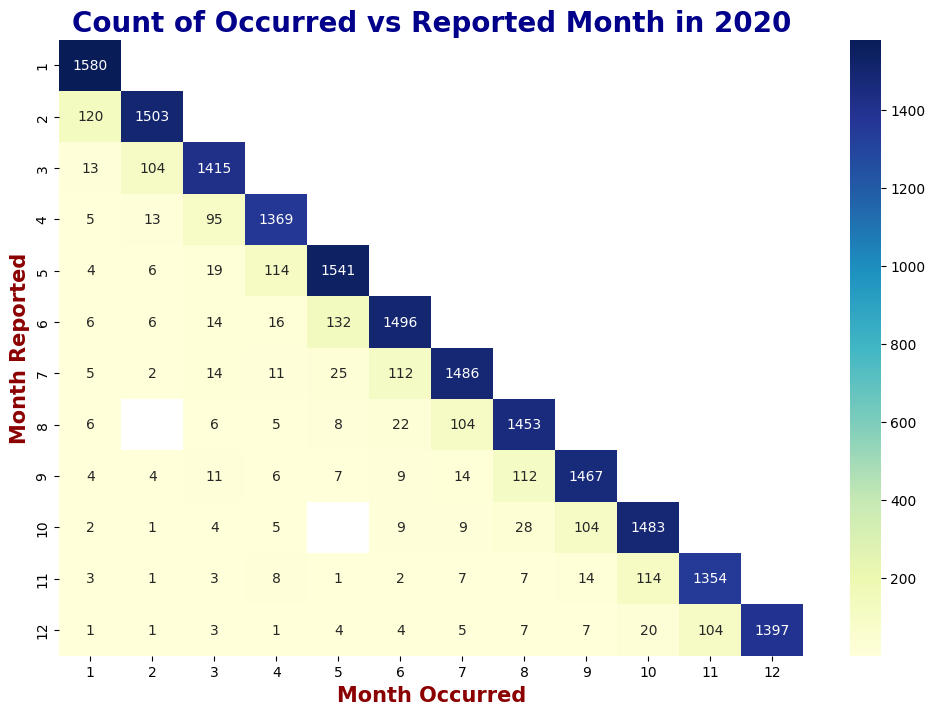

In [53]:
filtered_data = train[train['Year_Occurred'] == train['Year_Reported']]

# Create a pivot table
pivot_table = pd.pivot_table(filtered_data, 
                             values='Location', 
                             index='Month_Reported', 
                             columns='Month_Occurred', 
                             aggfunc='count', 
                             fill_value=0)

# Filter the pivot table to only include Month_Reported >= Month_Occurred
for col in pivot_table.columns:
    pivot_table.loc[col:, col] = pivot_table.loc[col:, col]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', mask=(pivot_table == 0))
plt.title('Count of Occurred vs Reported Month in 2020', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Month Occurred', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Month Reported', fontsize=15, fontweight='bold', color='darkred')
plt.show()

### Insights
* Most of the cases were reported the same month they were occurred 
* A few cases were reported the following month 


<hr>

<a id='h3-4.6'> </a>
### **Analysis of Crime Duration by Category** 

/tmp/ipykernel_33/1193172463.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Target_Label', y='Duration', data=train, jitter=True, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

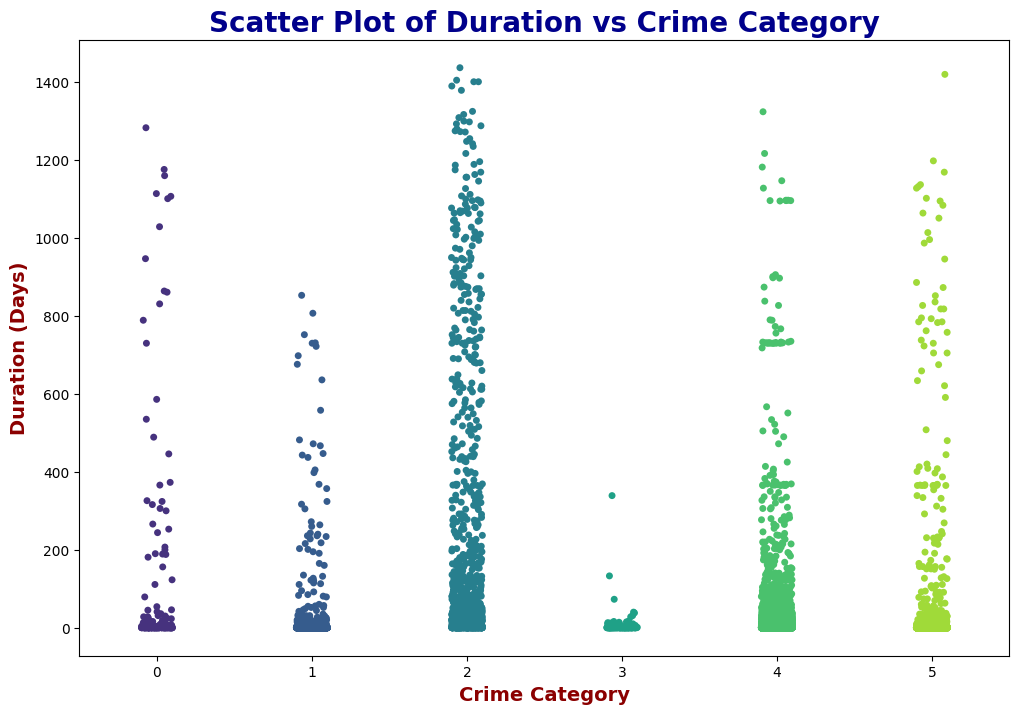

In [54]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Target_Label', y='Duration', data=train, jitter=True, palette='viridis')
plt.title('Scatter Plot of Duration vs Crime Category', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Crime Category', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Duration (Days)', fontsize=14, fontweight='bold', color='darkred')
plt.show()

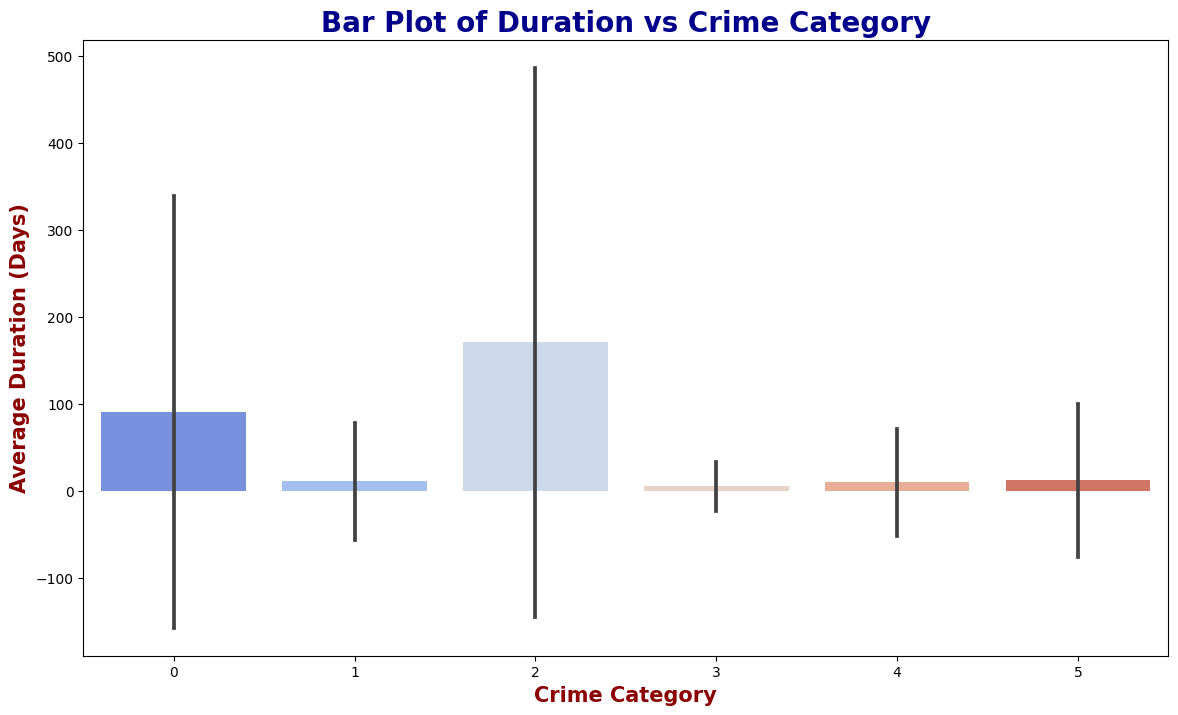

In [55]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Target_Label', y='Duration', data=train, palette='coolwarm', errorbar='sd')

plt.title('Bar Plot of Duration vs Crime Category', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Crime Category', fontsize=15, fontweight='bold', color='darkred')
plt.ylabel('Average Duration (Days)', fontsize=15, fontweight='bold', color='darkred')

plt.show()


<hr>

<a id='h4'></a>
# Preprocessing 

In [56]:
train = train.drop(columns=['Cross_Street','Weapon_Used_Code','Premise_Description','Weapon_Description','Area_Name','Status_Description','Time_Occurred'])
test = test.drop(columns=['Cross_Street','Weapon_Used_Code','Premise_Description','Weapon_Description','Area_Name','Status_Description','Time_Occurred'])

train.head()

,Location,Latitude,Longitude,Date_Reported,Date_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,...,Duration,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Status_Num,Victim_Sex_Label,Victim_Descent_Label
0,4500 CARPENTER AV,34.1522,-118.3910,2020-03-09,2020-03-06,15.0,1563,1.0,0385,75.0,...,3,2020,3,9,2020,3,6,2,2,14
1,45TH ST,34.0028,-118.2391,2020-02-27,2020-02-27,13.0,1367,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,...,0,2020,2,27,2020,2,27,2,2,6
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,2020-08-21,2020-08-21,13.0,1343,2.0,0329 1202,67.0,...,0,2020,8,21,2020,8,21,2,2,1
3,14900 ORO GRANDE ST,34.2953,-118.4590,2020-11-08,2020-11-06,19.0,1924,1.0,0329 1300,61.0,...,2,2020,11,8,2020,11,6,2,2,6
4,7100 S VERMONT AV,33.9787,-118.2918,2020-02-25,2020-02-25,12.0,1245,1.0,0416 0945 1822 0400 0417 0344,0.0,...,0,2020,2,25,2020,2,25,2,3,15


In [57]:
col =train.columns
col_t =test.columns

In [58]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='most_frequent')


In [59]:
train = imputer.fit_transform(train)
test = imputer.fit_transform(test) 
# fit_transform converts into numpy array, so we should convert it back to dataset 

In [60]:
train = pd.DataFrame(data=train, columns = col)
test = pd.DataFrame(data=test, columns = col_t) 

In [61]:
train.isnull().sum()

Location                 0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Status                   0
Crime_Category           0
Target_Label             0
Crime_Time               0
Age_Cat                  0
Duration                 0
Year_Reported            0
Month_Reported           0
Day_Reported             0
Year_Occurred            0
Month_Occurred           0
Day_Occurred             0
Status_Num               0
Victim_Sex_Label         0
Victim_Descent_Label     0
dtype: int64

In [62]:
train = train.drop(columns=['Status','Victim_Sex','Victim_Descent','Day_Reported','Day_Occurred','Year_Occurred','Location','Date_Reported','Date_Occurred','Age_Cat','Target_Label','Reporting_District_no'])
test = test.drop(columns=['Status','Victim_Sex','Victim_Descent','Day_Reported','Day_Occurred','Year_Occurred','Location','Date_Reported','Date_Occurred','Reporting_District_no'])


* Since we have encoded status, victim_sex, victim_descent we can drop them 
* Day reported and occurred and year_occurred gives no new information
* Date reported and occurred is broken down to month which is taken for the dataframe and thus it can be dropped 
* Location and age_cat are redundant columns of latitute n longitude and age 
* We saw above that area_id and reporting_id have correlation 1 thus we can drop one 

<hr>

<a id='h5'> </a>
# Transformation

In [63]:
X = train.drop(columns=['Crime_Category'])
y = train['Crime_Category']
X.columns

Index(['Latitude', 'Longitude', 'Area_ID', 'Part 1-2', 'Modus_Operandi',
       'Victim_Age', 'Premise_Code', 'Crime_Time', 'Duration', 'Year_Reported',
       'Month_Reported', 'Month_Occurred', 'Status_Num', 'Victim_Sex_Label',
       'Victim_Descent_Label'],
      dtype='object')

In [64]:
test.columns

Index(['Latitude', 'Longitude', 'Area_ID', 'Part 1-2', 'Modus_Operandi',
       'Victim_Age', 'Premise_Code', 'Crime_Time', 'Duration', 'Year_Reported',
       'Month_Reported', 'Month_Occurred', 'Status_Num', 'Victim_Sex_Label',
       'Victim_Descent_Label'],
      dtype='object')

### **Columns of X_train and test match**

In [65]:
num_columns = ['Latitude','Longitude','Victim_Age','Duration','Crime_Time','Year_Reported','Month_Reported','Month_Occurred']
text_columns = ['Modus_Operandi']
cat_columns = ['Area_ID','Part 1-2','Premise_Code','Status_Num','Victim_Sex_Label','Victim_Descent_Label']

<hr>

<a id='h6'> </a>
# Pipeline

In [66]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown ='ignore'))
])

Transformer = ColumnTransformer(
transformers=[
    ('num',num_pipeline,num_columns),
    ('cat',cat_pipeline,cat_columns),
    ('text',TfidfVectorizer(),'Modus_Operandi')
])

In [67]:
Transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Latitude', 'Longitude', 'Victim_Age',
                                  'Duration', 'Crime_Time', 'Year_Reported',
                                  'Month_Reported', 'Month_Occurred']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Area_ID', 'Part 1-2', 'Premise_Code',
                                  'Status_Num', 'Victim_Sex_Label',
                                  'Victim_Descent_Label']),
                                ('text', TfidfVectorizer(), 'Modus_Operandi')])

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_train_processed = Transformer.fit_transform(X_train,y_train)
X_val_processed = Transformer.transform(X_val)
X_test_processed = Transformer.transform(test)

In [70]:
y_train.unique()

array(['Property Crimes', 'Violent Crimes',
       'Fraud and White-Collar Crimes', 'Crimes against Public Order',
       'Other Crimes', 'Crimes against Persons'], dtype=object)

In [71]:
y_train.isna().sum()

0

<hr>

In [72]:
# preprocessor_pca=ColumnTransformer([('num_pipe',num_pipeline,num_cols),('cat_pipe',cat_pipeline,cat_cols),('location',text_pipeline,'Location'),
#                                  ('modus',TfidfVectorizer(),'Modus_Operandi')],sparse_threshold = 0)
# pca_pipeline = Pipeline([('transformation',preprocessor_pca),('pca',PCA(n_components = 2000))])

In [73]:
# x_train_transformed_pca = pca_pipeline.fit_transform(x_train,y_train)
# x_test_transformed_pca = pca_pipeline.transform(x_test)

<a id='h7'> </a>
# Model Training and Evaluation 

<a id='h7.1'> </a>
## LGBMClassifier

In [74]:
model1 = LGBMClassifier(random_state = 0)
model1.fit(X_train_processed,y_train)
y_pred1 = model1.predict(X_val_processed)
model1.score(X_val_processed,y_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11278
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 273
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394


0.952

### Accuracy 

In [75]:
score_lbg = accuracy_score(y_val,y_pred1)
score_lbg

0.952

### Classification Report

In [76]:
report = classification_report(y_val,y_pred1)
print(report)

                               precision    recall  f1-score   support

       Crimes against Persons       0.66      0.66      0.66        32
  Crimes against Public Order       0.81      0.85      0.83       374
Fraud and White-Collar Crimes       0.97      0.93      0.95       267
                 Other Crimes       0.38      0.14      0.21        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.94      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.79      0.75      0.76      4000
                 weighted avg       0.95      0.95      0.95      4000



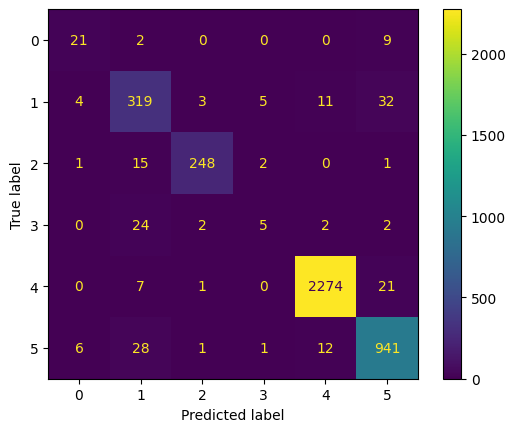

In [77]:
con_mat1 = confusion_matrix(y_val,y_pred1)
display1 = ConfusionMatrixDisplay(con_mat1)
display1.plot()
plt.show()

### Insights
#### we can see that predicted label 1 and 5 is what we could tune to make it more accurate

<hr>

### Encoding the Y Label for further models 

In [78]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

<a id='h7.2'> </a>
## XGBoost

In [79]:
model2 = XGBClassifier(random_state=0)
model2.fit(X_train_processed,y_train_encoded)

# predicting Y
y_pred2 = model2.predict(X_val_processed)
y_pred2 = label_encoder.inverse_transform(y_pred2) # decoding it

# score
model2.score(X_val_processed,y_val_encoded)

0.9505

In [80]:
score_xgb = accuracy_score(y_val,y_pred2)
score_xgb

0.9505

In [81]:
report2 = classification_report(y_val,y_pred2)
print(report2)

                               precision    recall  f1-score   support

       Crimes against Persons       0.60      0.66      0.63        32
  Crimes against Public Order       0.83      0.86      0.84       374
Fraud and White-Collar Crimes       0.96      0.93      0.94       267
                 Other Crimes       0.38      0.14      0.21        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.78      0.75      0.76      4000
                 weighted avg       0.95      0.95      0.95      4000



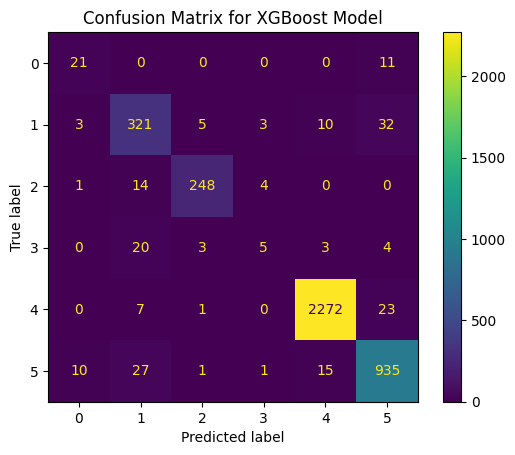

In [82]:
con_mat2 = confusion_matrix(y_val,y_pred2)
display2 = ConfusionMatrixDisplay(con_mat2)
display2.plot()
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

### Insights
#### Again predicted label 1 and 5 could be tuned for better accuracy 

<hr>

<a id='h7.3'> </a>
## Decision Tree

In [83]:
model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_train_processed,y_train_encoded)

y_pred3 = model3.predict(X_val_processed)
y_pred3 = label_encoder.inverse_transform(y_pred3) # decoding it

score_dt = model3.score(X_val_processed,y_val_encoded)
score_dt

0.922

In [84]:
report3 = classification_report(y_val,y_pred3)
print(report3)

                               precision    recall  f1-score   support

       Crimes against Persons       0.42      0.53      0.47        32
  Crimes against Public Order       0.76      0.75      0.75       374
Fraud and White-Collar Crimes       0.89      0.94      0.91       267
                 Other Crimes       0.33      0.43      0.37        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.91      0.88      0.89       989

                     accuracy                           0.92      4000
                    macro avg       0.72      0.75      0.73      4000
                 weighted avg       0.92      0.92      0.92      4000



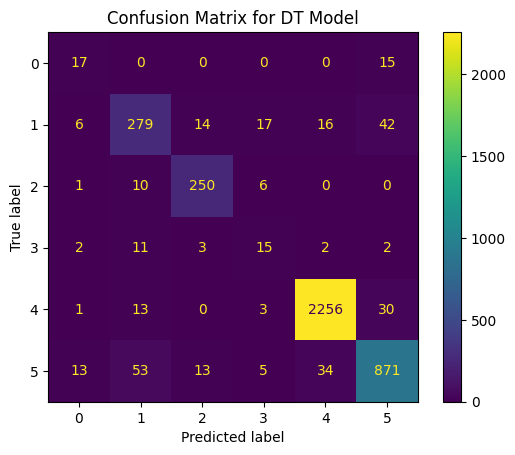

In [85]:
con_mat3 = confusion_matrix(y_val,y_pred3)
display3 = ConfusionMatrixDisplay(con_mat3)
display3.plot()
plt.title("Confusion Matrix for DT Model")
plt.show()

### Insights
#### Label 3 is being predicted better here but Label 5 is not 

<hr>

<a id='h7.4'> </a>
## Logistic Regression

In [86]:
model4 = LogisticRegression(random_state=0)
model4.fit(X_train_processed,y_train_encoded)

y_pred4 = model4.predict(X_val_processed)
y_pred4 = label_encoder.inverse_transform(y_pred4)
score_lg = model4.score(X_val_processed,y_val_encoded)
score_lg

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9455

In [87]:
report4 = classification_report(y_val,y_pred4)
print(report4)

                               precision    recall  f1-score   support

       Crimes against Persons       0.57      0.41      0.47        32
  Crimes against Public Order       0.82      0.84      0.83       374
Fraud and White-Collar Crimes       0.98      0.94      0.96       267
                 Other Crimes       0.71      0.29      0.41        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.91      0.94      0.93       989

                     accuracy                           0.95      4000
                    macro avg       0.83      0.73      0.76      4000
                 weighted avg       0.94      0.95      0.94      4000



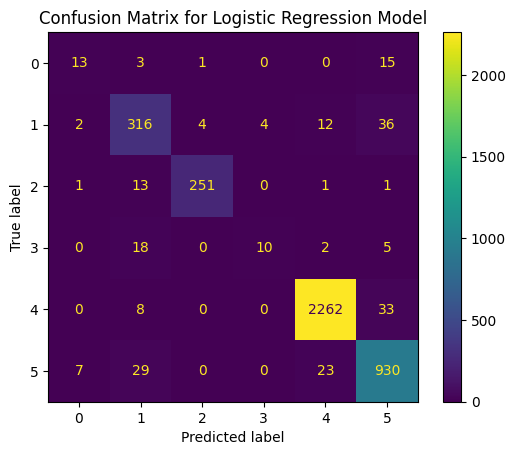

In [88]:
con_mat4 = confusion_matrix(y_val,y_pred4)
display4 = ConfusionMatrixDisplay(con_mat4)
display4.plot()
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

<hr>

## Hyperparameter Tuning

In [89]:
# use lightgbm because it is the best model
# param_grid1 = {"num_leaves":[25,35],
#               "min_data_in_leaf":[15,20],
#               "learning_rate":[0.1,0.01]}
# grid_lgbm = GridSearchCV(LGBMClassifier(),param_grid=param_grid1,cv=2,verbose=3,n_jobs=-1)
# grid_lgbm.fit(X_train_processed,y_train)
best_params = {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 31, 'verbose': -1}
best_model = LGBMClassifier(**best_params)

best_model.fit(X_train_processed,y_train)
y_pred = best_model.predict(X_val_processed)
best_model.score(X_val_processed,y_val)

0.95275

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


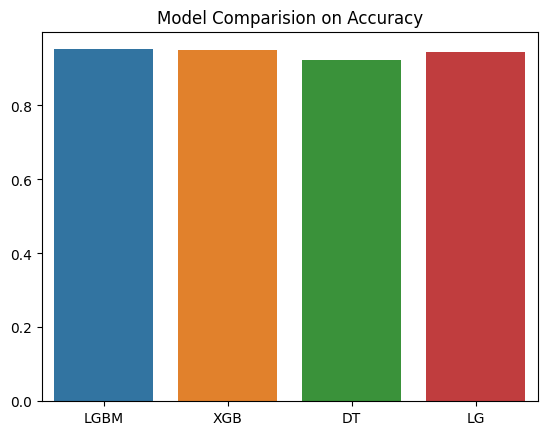

In [90]:
model_name = ['LGBM',"XGB","DT","LG"]
accuracy = [score_lbg,score_xgb,score_dt,score_lg]
sns.barplot(x=model_name,y=accuracy)
plt.title("Model Comparision on Accuracy")
plt.show()

In [91]:
X_train_final = Transformer.fit_transform(X,y)
X_test_final = Transformer.transform(test)

In [92]:
final_model = LGBMClassifier()
final_model.fit(X_train_final,y)
y_pred_final = final_model.predict(X_test_final)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13046
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 292
[LightGBM] [Info] Start training from score -4.487387
[LightGBM] [Info] Start training from score -2.403511
[LightGBM] [Info] Start training from score -2.691931
[LightGBM] [Info] Start training from score -4.716102
[LightGBM] [Info] Start training from score -0.539054
[LightGBM] [Info] Start training from score -1.434015


In [93]:
submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_pred_final,
                          }
                         )
submission.to_csv('submission.csv',index=False)

# Feature engineering techniques 